# MSDS 7331 Data Mining  /  Lab 2
#####  Due:  Sunday, Oct 29th, 2017
### Project team:- 
- **Hari Sanadhya**
- **Alfeo Sabay**
- **Aravind Veluchamy**
- **Mustafa Sakarwala**

For this project, we are using the dataset from Lab 1. So some of the contents of the Business Understanding, Data Understanding and Data Preparation section are the same as of lab 1. 

# Table of Contents 
#### <a href="#Part1">Part 1: Business Understanding</a>
#### <a href="#Part2">Part 2: Data Preparation part 1</a>
#### <a href="#Part3">Part 3: Data Preparation part 2</a>
#### <a href="#Part4">Part 4: Modeling and Evaluation 1</a>
#### <a href="#Part5">Part 5: Modeling and Evaluation 2</a>
#### <a href="#Part6">Part 6: Modeling and Evaluation 3, 4</a>
#### <a href="#Part8">Part 8: Modeling and Evaluation 5</a>
#### <a href="#Part9">Part 9: Modeling and Evaluation 6</a>
#### <a href="#Part10">Part 10: Deployment</a>
#### <a href="#Part11">Part 11: Exceptional Work</a>

<a id="Part1"></a>
## Business Understanding
Due to the growth in communication and Information Technology, online news has also gained a lot of popularity. This enables news organizations to publish news articles as soon as an event unfolds without having to wait on traditional media like print. The advent of online news has also introduced many new news outlets in addition to the existing big names. For online news outlets, the number of times an article from that particular outlet is shared shows the popularity and credibility of the news outlet. 

The dataset that we will be using for this lab is the __‘Online News Popularity Data Set’__ from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). This dataset describes the popularity of articles through an attribute to measure the number of times the article was shared on social media from a website called Mashable (www.mashable.com) in a period of two years and other attributes that describe the statistics associated with it.

For the purpose of this lab we would be performing:
* Regression to perdict the number of shares of the news article on Social Media
* Classification to predict the popularity of the news article by classifying the number of shares as low_popularity, medium_popularity and high_popularity.

For future validations of the predicted model we are going use cross validation for verifying the model and, we are going to split the data set in 80% training and 20% test set for validation of the predicted model. So, we are going to use either cross validation and/or test and training datasets for validation.

<a id="Part2"></a>
## Data Preparation Part 1
This phase covers all activities like data quality analysis, cleaning, transformation etc. to construct the final dataset that will be used by data modelling

### Import data and perform Explanatory Data Analysis

In [47]:
# Import the packages required
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# override the default value of 60 rows/columns so that more rows/columns can be displayed as the output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [48]:
!ls -l

total 30424
-rwx------+ 1 4294967295 mkpasswd   161312 Oct 28 10:33 DesisionTree.dot
-rwx------  1 Neetu Hari mkpasswd  1047051 Oct 29 12:48 Lab2-Classification - SabaySakarwalaVeluchamySanadhya -MS.ipynb
-rwx------  1 Neetu Hari mkpasswd  1069379 Oct 29 15:26 Lab2-Classification - SabaySakarwalaVeluchamySanadhya -Regression.ipynb
-rwx------  1 Neetu Hari mkpasswd  1061252 Oct 28 13:58 Lab2-Classification - SabaySakarwalaVeluchamySanadhya.ipynb
-rwx------  1 Neetu Hari mkpasswd  1160353 Oct 29 14:45 Lab2-Classification - SabaySakarwalaVeluchamySanadhya_Al Latest.ipynb
-rwx------  1 Neetu Hari mkpasswd  1154641 Oct 29 12:04 Lab2-Classification - SabaySakarwalaVeluchamySanadhya_Al new.ipynb
-rwx------  1 Neetu Hari mkpasswd   757722 Oct 29 17:24 Lab2-Classification - SabaySakarwalaVeluchamySanadhya_Al.ipynb
-rwx------  1 Neetu Hari mkpasswd 24311769 Sep 15 20:18 OnlineNewsPopularity.csv
-rwx------+ 1 4294967295 mkpasswd   410679 Oct 28 13:11 Untitled.ipynb
drwx------+ 1 Neetu Hari mkpass

In [49]:
df_news = pd.read_csv("OnlineNewsPopularity.csv")

In [50]:
df_news.columns.values

array(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity',

After inporting the dataset and looking into the column names, it appears that the column headers have leading spaces which makes the column heading not as per the industry standards.
So we modified the read_csv function call to have separator as __'\s*,\s*'__ meaning that the read_csv function will treat all the leading and trailing spaces with comma as the separator and hence will remove the additional spaces.

In [51]:
df_news = pd.read_csv("OnlineNewsPopularity.csv", sep='\s*,\s*', engine='python')
df_news.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words'

In [52]:
# view first 5 records of the dataset 
df_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [53]:
# view last 5 records of the dataset 
df_news.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


Looking into the first and last 5 rows of the dataset, the dataset appears to be well formed. There are no missing values that we could observe in the 10 records displayed. There are few negative values that we obesrved but will need to look into whether those are true values or some garbage data.

In [54]:
pd.merge(pd.DataFrame(df_news.dtypes, columns={"Data_type"}), df_news.describe(include='all').T, 
         left_index=True, right_index=True)

,Data_type,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,object,39644,39644,http://mashable.com/2014/10/28/scream-tv-show-...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timedelta,float64,39644,NaN,NaN,NaN,354.53,214.164,8,164,339,542,731
n_tokens_title,float64,39644,NaN,NaN,NaN,10.3987,2.11404,2,9,10,12,23
n_tokens_content,float64,39644,NaN,NaN,NaN,546.515,471.108,0,246,409,716,8474
n_unique_tokens,float64,39644,NaN,NaN,NaN,0.548216,3.52071,0,0.47087,0.539226,0.608696,701
n_non_stop_words,float64,39644,NaN,NaN,NaN,0.996469,5.23123,0,1,1,1,1042
n_non_stop_unique_tokens,float64,39644,NaN,NaN,NaN,0.689175,3.26482,0,0.625739,0.690476,0.75463,650
num_hrefs,float64,39644,NaN,NaN,NaN,10.8837,11.332,0,4,8,14,304
num_self_hrefs,float64,39644,NaN,NaN,NaN,3.29364,3.85514,0,1,3,4,116
num_imgs,float64,39644,NaN,NaN,NaN,4.54414,8.30943,0,1,1,4,128


Convert all the binary features to int16 instead of float64 to save the space and assign correct data type to the feature. <br>
Also convert all the fields containing the counts values to int64 instead of float64 to assign correct data type to the feature.

In [55]:
col_list_binary = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
    'data_channel_is_socmed','data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 
    'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday', 'is_weekend']
col_list_counters = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
                        'num_keywords' ]
df_news[col_list_counters] = df_news[col_list_counters].apply(np.int64, axis=1)
df_news[col_list_binary] = df_news[col_list_binary].apply(np.int16, axis=1)

In [56]:
pd.merge(pd.DataFrame(df_news.dtypes, columns={"Data_type"}), df_news.describe(include='all').T, 
         left_index=True, right_index=True)

,Data_type,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,object,39644,39644,http://mashable.com/2014/10/28/scream-tv-show-...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timedelta,float64,39644,NaN,NaN,NaN,354.53,214.164,8,164,339,542,731
n_tokens_title,int64,39644,NaN,NaN,NaN,10.3987,2.11404,2,9,10,12,23
n_tokens_content,int64,39644,NaN,NaN,NaN,546.515,471.108,0,246,409,716,8474
n_unique_tokens,float64,39644,NaN,NaN,NaN,0.548216,3.52071,0,0.47087,0.539226,0.608696,701
n_non_stop_words,float64,39644,NaN,NaN,NaN,0.996469,5.23123,0,1,1,1,1042
n_non_stop_unique_tokens,float64,39644,NaN,NaN,NaN,0.689175,3.26482,0,0.625739,0.690476,0.75463,650
num_hrefs,int64,39644,NaN,NaN,NaN,10.8837,11.332,0,4,8,14,304
num_self_hrefs,int64,39644,NaN,NaN,NaN,3.29364,3.85514,0,1,3,4,116
num_imgs,int64,39644,NaN,NaN,NaN,4.54414,8.30943,0,1,1,4,128


** Observations: ** <br>
* The dataset has 39644 records with 61 variables. There are no missing values in the dataset i.e. all the columns have values populated.
* The url field is having all distinct url's (value in unique column = value of count column for url field) which means that the dataset is not having any duplicate URL's.
* The minimum value of field n_tokens_title is 2 which means that all the url's have titles defined with maximum value as 23 and median as 10. So the titles are well formed w.r.t. the length. They are not very big in length.
* The difference between 75 percentile and maximum values for the columns __n_tokens_content, n_unique_tokens', n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs and num_videos__ is large indicating that there are some outliers or in other words, some of the urls are having large content (text, images, and videos). Boxplots/Histograms for these variables would reflect strong left skewness.
* The response variable __*shares*__ has the minimum value of 1 and maximum value of 843300 with 75 percentile value as 2800 stating that all of the URL's recorded have been shared at least once and there there are a few with very high number of shares. Boxplot should show left skewness.
* Attribute kw_max_max is having all values at or above 25 percentile as 843300. Also on closely looking into the output, we notice that the maximum value that is present for any field is 843300. This cannot be just coincidence. This appears that the system from where the data is collected is having the storage limitation. They can store values till 843300. So all the 843300 values would mean that the field has reached its maximum limit and further additions will not get recorded. Also as a part of this lab, we have not handled this limitation and have left the value 843300 as it is though kept in mind that the value of 843300 mean that the value in actual can be anything greater then or equal to the value itself.
* kw_min_min, kw_avg_min, kw_min_avg are counter fields and as the above output shows, they have -1 as their current values which is not a valid value. For kw_min_min, all of the minimum, 25 percentile and 50 percentile values are -1 means that more than 50% of the records have the value of kw_min_min as -1. This does not look like a data error to us, it appears more of like a specific conditional values given to the field. We tried to search for the logic for the same but were not able to find any. We even contacted the person on Kaggle for the explanation regarding this but got no response. So will need to analyze this in more detail.

The overall quality of the dataset is considered to be good. However, there are a few changes required to improve sanity and for ease of interpretation. They are as follows:

1.	The dataset have seven variables to account for which day of the week the article was published and one more variable for whether the article was published on a weekend, we would perform the check to see if there is any article present in the dataset having publishing day not present. That would mean that either there has been a miss while recording the data or the article has not yet been published (number of shares=0 with missing day published information might be an indication of news article not published). ALso the published on weekend field need to be cross validated against the published day of week.

2.	The dataset has six variables to account for the Data Channel. We need to verify that all the news articles have a Data Channel defined. So if there is any news article having missing Data Channel, then we will create a new variable representing data channel as others.

   <p> </p>
* Based on the column defination, here are a few noteworthy points to verify the data quality. For each record:
    * URL content should have al least one value populated __n_tokens_content,  num_hrefs, num_imgs__ and __num_videos__ as if they all are zero simultaneously, it would mean that the URL was published without any content in it.
    * if column __n_tokens_content__  has value greater than 0, then the value of column __n_unique_tokens__ should be non-zero.
    * value in attribute __num_self_hrefs__ should be less then or equal to the corresponding value in the column __num_hrefs__.
    * value in attribute __n_non_stop_unique_tokens__ should be less then or equal to the corresponding value in the column __n_non_stop_words__.
    * Below should be the order of the attribute values in a record when compared with each other:
        * kw_min_min <= kw_avg_min <= kw_max_min
        * kw_min_max <= kw_avg_max <= kw_max_max
        * kw_min_avg <= kw_avg_avg <= kw_max_avg
        * self_reference_min_shares <= self_reference_avg_sharess <= self_reference_max_shares
        * min_positive_polarity <= avg_positive_polarity <= max_positive_polarity
        * min_negative_polarity <= avg_negative_polarity <= max_negative_polarity
    <p><br></p>

### URL content analysis
Analyze if in the dataset, there's data corresponding to any URL such that the sum of fields:
<font color=blue>
* number of words in the content
* number of hyperlinks in the URL content
* number of images 
* number of videos
</font>
is zero meaning that the URL does not have any text, images or videos in the content.

In [57]:
col_list_counters = ['n_tokens_content',  'num_hrefs', 'num_imgs', 'num_videos']
df_news[col_list_counters].apply(sum, axis=1).describe()

count    39644.000000
mean       563.192438
std        479.403834
min          0.000000
25%        258.000000
50%        425.000000
75%        735.000000
max       8633.000000
dtype: float64

The output above states that there are some URL's having the sum of __'n_tokens_content',  'num_hrefs', 'num_imgs', 'num_videos'__ as zero (minimum=0) meaning the url has no text content, hyperlinks, images or videos signalling that either the url is blank or the values recorded are not correct. <br>
So need to analyze how many such url's exist and then examine their content.

In [58]:
df_news[df_news[col_list_counters].apply(sum, axis=1)==0]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8,0,0.0,0.0,0.0,0,0,0,0,0.0,10,1,0,0,0,0,0,217.0,2000.0,582.285714,0.0,51900.0,16080.000000,0.000000,2939.239130,1596.149445,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0.020362,0.133522,0.020019,0.020554,0.805543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12,0,0.0,0.0,0.0,0,0,0,0,0.0,9,0,0,0,0,1,0,217.0,2500.0,669.000000,0.0,51900.0,17255.555556,0.000000,4380.000000,2328.023284,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.532843,0.022387,0.260606,0.023187,0.160977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10,0,0.0,0.0,0.0,0,0,0,0,0.0,7,0,0,1,0,0,0,217.0,1700.0,611.000000,0.0,51900.0,13628.571429,0.000000,4408.000000,2332.097082,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0.885229,0.028718,0.028587,0.028866,0.028599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14,0,0.0,0.0,0.0,0,0,0,0,0.0,10,0,1,0,0,0,0,217.0,1700.0,517.800000,440.0,51900.0,17628.000000,440.000000,4423.333333,2305.412167,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.020977,0.020356,0.020075,0.918569,0.020023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
1352,http://mashable.com/2013/01/30/davos-social-me...,708.0,10,0,0.0,0.0,0.0,0,0,0,0,0.0,10,0,0,0,0,0,1,217.0,1700.0,532.000000,0.0,51900.0,22380.000000,0.000000,4555.000000,2882.018787,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0.622872,0.020124,0.316661,0.020258,0.020085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1200
1454,http://mashable.com/2013/01/31/nfl-super-bowl-...,707.0,9,0,0.0,0.0,0.0,0,0,0,0,0.0,10,0,1,0,0,0,0,217.0,2100.0,642.900000,2100.0,69100.0,27050.000000,1712.394737,3809.000000,2895.485104,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0.668097,0.271192,0.020081,0.020553,0.020077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433333,0.066667,0.066667,0.066667,2100
1653,http://mashable.com/2013/02/04/super-bowl-soci...,703.0,11,0,0.0,0.0,0.0,0,0,0,0,0.0,10,0,1,0,0,0,0,217.0,1000.0,439.200000,560.0,69100.0,26666.000000,500.000000,3880.153846,2539.488208,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.454384,0.020575,0.020069,0.484957,0.020015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411111,0.205556,0.088889,0.205556,2100
1726,http://mashable.com/2013/02/05/online-dating-h...,702.0,10,0,0.0,0.0,0.0,0,0,0,0,0.0,10,1,0,0,0,0,0,217.0,1600.0,677.111111,0.0,69100.0,20100.000000,0.000000,6125.000000,3015.820633,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.354709,0.020316,0.020021,0.021011,0.583944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190476,-0.119048,0.309524,0.119048,2000
1741,http://mashable.com/2013/02/05/social-tv-chart...,702.0,11,0,0.0,0.0,0.0,0,0,0,0,0.0,9,0,1,0,0,0,0,217.0,1000.0,458.666667,560.0,69100

So of the 39644 URL's data collected, 101 URL's data show that it doesnt have any images, videos, text or hyperlinks. We opened few random URL's on the browser to see what's the content of the URL's. We found that these URL's have images, videos, text, hyperlinks meaning that these are some observations recorded with errors while recording.
To get the correct values of all the variables corresponding to these 101 records, we have these options:-
1. impute the zero values by using some imputation algorithm 
* ingore the finding and proceed further
* visit these URL's manually and compute the values of these variables manually

Since the number 101 is very less as compared to 39644, we decided to drop these observations from our dataset and proceed with the remaining observations. we didn't go with imputation as almost all of the attributes corresponding to these 101 observations have 0 value and imputing all of those would not be accurate or even possible.

In [59]:
df_news = df_news[(df_news[col_list_counters].apply(sum, axis=1)!=0)]
print("The dataframe size after dropping the 101 records discussed above: ", len(df_news), " observations")

The dataframe size after dropping the 101 records discussed above:  39543  observations


### Analysis of Data Channels
Analyze the values of the Data Channel attributes to find if:
1. the maximum number of Data Channels defined for a URL if URL has more then one possible Data Channel.
* a Data Channel is defined for all the URL's in the dataset.

In [60]:
data_channel_columns = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
                        'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']
df_news[data_channel_columns].apply(sum, axis=1).describe()

count    39543.000000
mean         0.846092
std          0.360865
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
dtype: float64

The above output shows that the maximum sum of the data channel values is 1 meaning that for any record, there is maximum one data channel defined. Since the 25 percentile is 1, this mean that majority of the records (more than 75 percent, mean value= 0.846092 indicates that 84.6% data) have the single data channel defined. Based on this, we are assuming that for any given URL, there can be only one possible data channel.
Also since the minimum value is zero, this mean that the data channel is not defined for some of the records (1-0.846092 = approx 15.4% records). There can be a few possibilities here:
1. Data channel is other than the 6 channels defined. 
* Issue while collecting the data from the data source.
* The URL was released without categorizing the data channel.

Since the logic of defining the data channel is not known, we decided to create a new data channel variable namely __'data_channel_is_miscellaneous'__ for the URL's whose data channel is not defined.
Below few section of code illustrates what we have discussed here.

In [61]:
# Create a new categorical attribute named data_channel having the data channel defined.
df_news['data_channel_is_miscellaneous'] = 1 - df_news[data_channel_columns].apply(sum,axis=1)
data_channel_columns = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'data_channel_is_miscellaneous']

### Analysis of weekday fields
Analyze values in all the 7 weekday fields and a published on weekend field to answers the questions below:
1. Are the URL's published on a day or there are multiple days populated
* Does all the URL's have published day populated 
* if is_weekend = 1 then only fields 'weekday_is_saturday' and 'weekday_is_sunday' can have a value of 1 

In [62]:
weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
                   'weekday_is_friday','weekday_is_saturday', 'weekday_is_sunday']
df_news[weekday_columns].apply(sum, axis=1).describe()

count    39543.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

Since the minimum value and the maximum value from the above output (sum of weekday field value for every row in the dataset) is 1, this mean that there is one and only one value defined in the entire dataset for the weekday fields which is logical as well because the URL cannot be published on multiple days. 

In [63]:
df_news[df_news['is_weekend'] != df_news[['weekday_is_saturday', 'weekday_is_sunday']].apply(sum,axis=1)]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_miscellaneous


The above output verifies that is_weekend field is in sinkn with weekday_is_saturday and weekday_is_sunday fields 

### Visualize and describe the distribution of the datachannel and published day of week fields

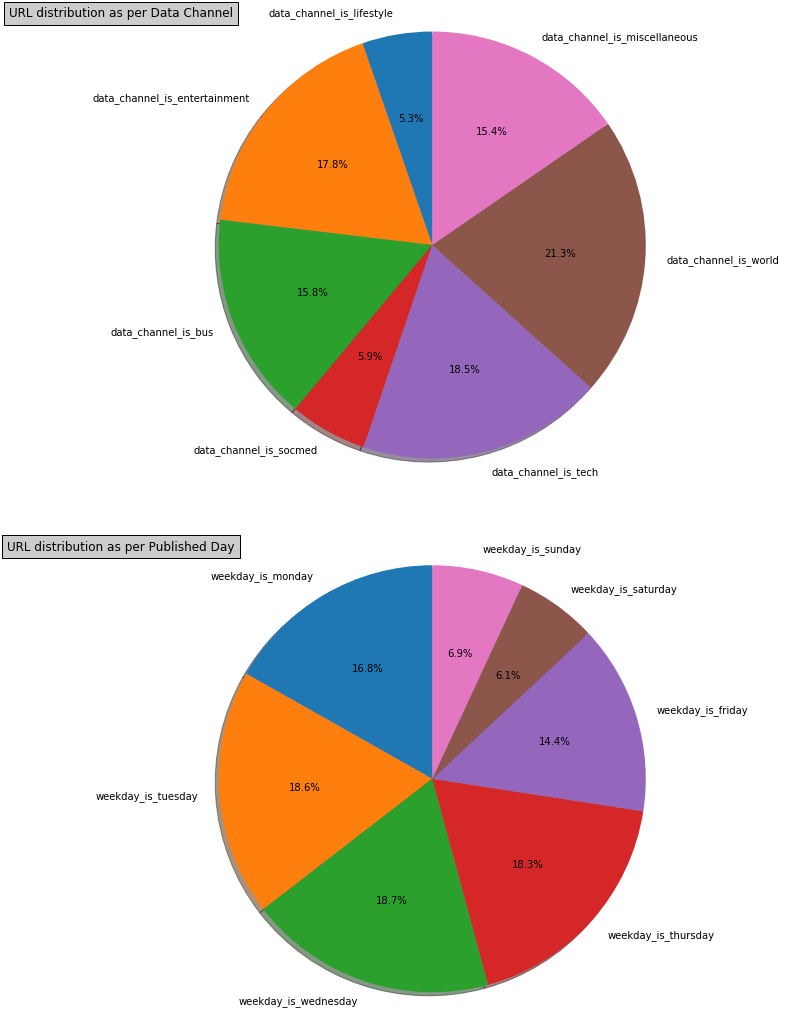

In [64]:
fig = plt.figure(figsize=(20,18))

the_grid = plt.GridSpec(2, 1)
df_plot_data = round(df_news[data_channel_columns].apply(sum, axis=0) / len(df_news) * 100,2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("URL distribution as per Data Channel",x=-.2, bbox={'facecolor':'0.8', 'pad':5}, )
plt.pie(df_plot_data, labels=df_plot_data.index, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2)
plt.subplot(the_grid[1, 0], aspect=1)
df_plot_data = round(df_news[weekday_columns].apply(sum, axis=0) / len(df_news) * 100,2)
plt.title("URL distribution as per Published Day",x=-0.2, bbox={'facecolor':'0.8', 'pad':5})
plt.pie(df_plot_data, labels=df_plot_data.index, autopct='%1.1f%%',  shadow=True, startangle=90, radius=1.2, center=(0,4))
plt.show()

The above two pie charts shows the distribution of URL's as per data channel and the published day. 15.5% of the URL's belong to the newly created data channel category 'miscellaneous'. Maximum URL's were published under the category 'world' and minimum under lifestyle.<br>
Majority of the URL's were published during the weekdays and a total of 13.1% of URL's were published during weekends (6.9% on Sunday and 6.2% on Saturday). Almost the same number of URLs were published on Tuesday's, Wednesday's and Thursday's suggesting that the preferred URL publishing time is on weekdays with little preference given to Tuesday, Wednesday and Thursday.

### Data validation for columns n_tokens_content and n_unique_tokens
If column n_tokens_content has value greater than 0, then the value of column n_unique_tokens should be non-zero.

In [65]:
df_news[['n_tokens_content', 'n_unique_tokens']].apply(lambda x: 
                                                     x[1]>0 if x[0]>0 
                                                     else x[1]==0 if x[0]==0
                                                     else None, axis=1
                                                    ).describe()

count     39543
unique        1
top        True
freq      39543
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that if the n_tokens_content is greater than zero then n_unique_tokens value is also greater than zero and if n_tokens_content is zero then n_unique_tokens value is also zero.

### Analysis of num_self_hrefs and num_hrefs
num_self_hrefs should be less then or equal to the corresponding value in the column num_hrefs.

In [66]:
df_news[['num_self_hrefs', 'num_hrefs']].apply(lambda x: x[1]>=x[0], axis=1).describe()

count     39543
unique        1
top        True
freq      39543
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that if num_self_hrefs is less then or equal to the corresponding value in the column num_hrefs.

### Analysis of n_non_stop_unique_tokens and n_non_stop_words
n_non_stop_unique_tokens should be less then or equal to the corresponding value in the column n_non_stop_words.

In [67]:
df_news[['n_non_stop_unique_tokens', 'n_non_stop_words']].apply(lambda x: x[1]>=x[0], axis=1).describe()

count     39543
unique        1
top        True
freq      39543
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that n_non_stop_unique_tokens is less then or equal to the corresponding value in the column n_non_stop_words.

### Analysis of values in kw_min_min, kw_avg_min and kw_max_min
kw_min_min <= kw_avg_min <= kw_max_min

In [68]:
df_news[['kw_min_min', 'kw_avg_min', 'kw_max_min']].apply(lambda x: x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     39543
unique        1
top        True
freq      39543
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that the condition kw_min_min <= kw_avg_min <= kw_max_min is satisfied for all the records in the dataset.

In [69]:
df_news[['kw_min_min', 'kw_avg_min', 'kw_max_min']].describe()

,kw_min_min,kw_avg_min,kw_max_min
count,39543.000000,39543.000000,39543.000000
mean,26.003819,312.212986,1153.386124
std,69.516394,620.993059,3855.260737
min,-1.000000,-1.000000,0.000000
25%,-1.000000,141.610556,445.000000
50%,-1.000000,235.428571,660.000000
75%,4.000000,356.732143,1000.000000
max,377.000000,42827.857143,298400.000000


__Analysis of -1 values in kw_min_min and kw_avg_min fields__

In [70]:
print('kw_min_min has -1 values in %d records of %d records' % (sum(df_news['kw_min_min']==-1),len(df_news)))
print('kw_avg_min has -1 values in %d records of %d records' % (sum(df_news['kw_avg_min']==-1),len(df_news)))

kw_min_min has -1 values in 22963 records of 39543 records
kw_avg_min has -1 values in 692 records of 39543 records


Since kw_avg_min has -1 values in 692 records of 39543 records, we decided to drop the records having kw_avg_min as -1. Also for kw_min_min which has -1 values in 22963 records of 39543 records, we changed all -1 values in this field to 0 after creating a new variable 'spl_flg_kw_min_min' which will be 1 when the kw_min_min field is -1 else would have value 0.

In [71]:
df_news = df_news[df_news['kw_avg_min']!=-1]
df_news['spl_flg_kw_min_min'] = df_news.kw_min_min.apply(lambda x: 1 if x==-1 else 0) 
df_news.kw_min_min = df_news.kw_min_min.apply(lambda x: 0 if x==-1 else x) 


### Analysis of values in kw_min_max, kw_avg_max and kw_max_max
kw_min_max <= kw_avg_max <= kw_max_max

In [72]:
df_news[['kw_min_max', 'kw_avg_max', 'kw_max_max']].apply(lambda x: x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     38851
unique        1
top        True
freq      38851
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that the condition kw_min_max <= kw_avg_max <= kw_max_max is satisfied for all the records in the dataset.


### Analysis of values in kw_min_avg, kw_avg_avg and kw_max_avg
kw_min_avg <= kw_avg_avg <= kw_max_avg

In [73]:
df_news[['kw_min_avg', 'kw_avg_avg', 'kw_max_avg']].apply(lambda x: x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     38851
unique        1
top        True
freq      38851
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that the condition kw_min_avg <= kw_avg_avg <= kw_max_avg is satisfied for all the records in the dataset.<br><br>
__Analysis of -1 values in kw_min_avg field__

In [74]:
print('kw_min_avg has -1 values in %d records of %d records' % (sum(df_news['kw_min_avg']==-1),len(df_news)))

kw_min_avg has -1 values in 6 records of 38851 records


Since there are only 6 records of 38851, we decided to drop those 6 records from the dataset.

In [75]:
df_news = df_news[df_news['kw_min_avg']!=-1]

### Analysis of values in self_reference_min_shares, self_reference_avg_sharess and self_reference_max_shares
self_reference_min_shares <= self_reference_avg_sharess <= self_reference_max_shares

In [76]:
df_news[['self_reference_min_shares', 'self_reference_avg_sharess' ,'self_reference_max_shares']].apply(lambda x: 
                                                            x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     38845
unique        2
top        True
freq      38844
dtype: object

The above query output have a two output value (unique=2) of which the majority is True. This means that the condition self_reference_min_shares <= self_reference_avg_sharess <= self_reference_max_shares is not satisfied for 1 record (38845 - 38844) in the dataset.<br>
So, let's analyze the records in the dataset for which the condition self_reference_min_shares <= self_reference_avg_sharess <= self_reference_max_shares is not satisfied.

In [77]:
df_news[df_news[['self_reference_min_shares', 'self_reference_avg_sharess' ,'self_reference_max_shares']].apply(
    lambda x: x[0]>x[1] or x[1]>x[2], axis=1)]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_miscellaneous,spl_flg_kw_min_min
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142.0,9,1570,701.0,1042.0,650.0,11,10,51,0,4.696178,7,0,1,0,0,0,0,0.0,778.0,143.714286,23100.0,843300.0,330442.857143,2420.579189,3490.598812,2912.105124,795.0,0.0,6924.375,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900,0,1


So the issue is that the self_reference_max_shares have the vale as 0.0 which is not correct as max value cannot be less than avg or minimum values. So in order to correct it, we need to impute the value using either the most close record or some imputation algorithm. For the above dataset, we looked for almost similar record and found one. Using the attribute value of self_reference_max_shares, we corrected the incorrect value for the URL at index 31037.

In [78]:
df_news[df_news[['self_reference_avg_sharess', 'data_channel_is_entertainment','timedelta', 'weekday_is_tuesday', 
                 'self_reference_min_shares']].apply(lambda x: x[0]>=6800 and x[0]>7100 and x[1]==1 
                    and x[2]>=135 and x[2]<=150 and x[3]==1 and x[4] >=780 and x[4]<=810, 
                                                     axis=1)].self_reference_max_shares

31478    49500.0
Name: self_reference_max_shares, dtype: float64

In [79]:
# Imputation and reverify the condition
df_news.set_value(31037, 'self_reference_max_shares', 49500.0)
df_news[['self_reference_min_shares', 'self_reference_avg_sharess' ,'self_reference_max_shares']].apply(lambda x: x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     38845
unique        1
top        True
freq      38845
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that the condition self_reference_min_shares <= self_reference_avg_sharess <= self_reference_max_shares is now satisfied for all the records in the dataset.

### Analysis of values in min_positive_polarity, avg_positive_polarity and max_positive_polarity
min_positive_polarity <= avg_positive_polarity <= max_positive_polarity

In [80]:
df_news[['min_positive_polarity', 'avg_positive_polarity', 'max_positive_polarity']].apply(lambda x:
                                x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     38845
unique        1
top        True
freq      38845
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that the condition min_positive_polarity <= avg_positive_polarity <= max_positive_polarity is satisfied for all the records in the dataset.

### Analysis of values in min_negative_polarity, avg_negative_polarity and max_negative_polarity
min_negative_polarity <= avg_negative_polarity <= max_negative_polarity

In [81]:
df_news[['min_negative_polarity', 'avg_negative_polarity', 'max_negative_polarity']].apply(lambda x: 
                                    x[0]<=x[1] and x[1]<=x[2], axis=1).describe()

count     38845
unique        1
top        True
freq      38845
dtype: object

The above query output have a single value (unique=1) and that too is just True. This means that the condition min_negative_polarity <= avg_negative_polarity <= max_negative_polarity is satisfied for all the records in the dataset.

### Drop the variables that are more required as a part of the study based on the above discussions

In [82]:
df_news.drop(['url'], axis=1 , inplace=True)

### Create the response variable (target classifier)

In [83]:
print('Number of news articles having shares >= 3000 are %d out of total %d records' 
      %(df_news[df_news.shares>=3000].shares.count(),len(df_news)))
print('Number of news articles having shares >= 2000 and < 3000 are %d out of total %d records' 
      %(df_news[(df_news.shares>=2000) & (df_news.shares<3000)].shares.count(),len(df_news)))
print('Number of news articles having shares >= 1000 and < 2000 are %d out of total %d records' 
      %(df_news[(df_news.shares>=1000) & (df_news.shares<2000)].shares.count(),len(df_news)))
print('Number of news articles having shares < 1000 are %d out of total %d records' 
      %(df_news[df_news.shares<1000].shares.count(),len(df_news)))

Number of news articles having shares >= 3000 are 9151 out of total 38845 records
Number of news articles having shares >= 2000 and < 3000 are 5043 out of total 38845 records
Number of news articles having shares >= 1000 and < 2000 are 13711 out of total 38845 records
Number of news articles having shares < 1000 are 10940 out of total 38845 records


__news_article_popularity = 0 which stands for extreme popularity and is computed as shares >= 3000<br>
news_article_popularity = 1 which stands for high popularity and is computed as shares between [2000, 3000)<br>
news_article_popularity = 2 which stands for medium popularity and is computed as shares between [1000, 2000)<br>
news_article_popularity = 3 which stands for low popularity and is computed as shares < 1000 <br><br>
Considering the sample is the representative of the population, the distribution of the four categories are (0.24, 0.13, 0.35, 0.28)__

In [84]:
df_news['news_article_popularity'] = np.int16(df_news.shares.apply(lambda x: 0 if x>=3000
                                                        else 1 if x>=2000
                                                        else 2 if x>=1000
                                                        else 3))

In [85]:
news_article_popularity_class = np.array(['extreme popularity', 'high popularity', 'medium popularity', 'low popularity'])

In [86]:
news_article_popularity_class

array(['extreme popularity', 'high popularity', 'medium popularity',
       'low popularity'],
      dtype='<U18')

In [87]:
df_news.tail()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_miscellaneous,spl_flg_kw_min_min,news_article_popularity
39638,8.0,11,223,0.653153,1.0,0.825758,5,3,1,0,4.923767,6,0,0,1,0,0,0,0.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159,2000.0,5700.0,3633.333333,0,0,1,0,0,0,0,0,0.551338,0.033337,0.033347,0.033335,0.348642,0.552041,0.268878,0.031390,0.004484,0.875000,0.125000,0.573469,0.214286,0.80,-0.250000,-0.25,-0.250000,0.000000,0.000000,0.500000,0.000000,1200,0,1,2
39639,8.0,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,8,0,0,0,0,1,0,0.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0,0,1,0,0,0,0,0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.50,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0,1,2
39640,8.0,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,7,0,0,0,1,0,0,0.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0,0,1,0,0,0,0,0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.40,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,0,1,2
39641,8.0,10,442,0.516355,1.0,0.644128,24,1,12,1,5.076923,8,0,0,0,0,0,0,0.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0,0,1,0,0,0,0,0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.80,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1,1,2
39643,8.0,10,157,0.701987,1.0,0.846154,1,1,0,2,4.471338,4,0,1,0,0,0,0,0.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0,0,1,0,0,0,0,0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.20,-0.200000,0.333333,0.250000,0.166667,0.250000,1300,0,1,2


In [88]:
# reset index
df_news.reset_index(inplace=True, drop=True)
df_news.tail()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_miscellaneous,spl_flg_kw_min_min,news_article_popularity
38840,8.0,11,223,0.653153,1.0,0.825758,5,3,1,0,4.923767,6,0,0,1,0,0,0,0.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159,2000.0,5700.0,3633.333333,0,0,1,0,0,0,0,0,0.551338,0.033337,0.033347,0.033335,0.348642,0.552041,0.268878,0.031390,0.004484,0.875000,0.125000,0.573469,0.214286,0.80,-0.250000,-0.25,-0.250000,0.000000,0.000000,0.500000,0.000000,1200,0,1,2
38841,8.0,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,8,0,0,0,0,1,0,0.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0,0,1,0,0,0,0,0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.50,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0,1,2
38842,8.0,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,7,0,0,0,1,0,0,0.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0,0,1,0,0,0,0,0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.40,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,0,1,2
38843,8.0,10,442,0.516355,1.0,0.644128,24,1,12,1,5.076923,8,0,0,0,0,0,0,0.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0,0,1,0,0,0,0,0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.80,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1,1,2
38844,8.0,10,157,0.701987,1.0,0.846154,1,1,0,2,4.471338,4,0,1,0,0,0,0,0.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0,0,1,0,0,0,0,0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.20,-0.200000,0.333333,0.250000,0.166667,0.250000,1300,0,1,2


In [89]:
pd.merge(pd.DataFrame(df_news.dtypes, columns={"Data_type"}), df_news.describe(include='all').T, 
         left_index=True, right_index=True)

,Data_type,count,mean,std,min,25%,50%,75%,max
timedelta,float64,38845.0,358.722744,212.905658,8.000000,171.000000,345.000000,546.000000,731.000000
n_tokens_title,int64,38845.0,10.390861,2.111678,2.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,int64,38845.0,546.692753,471.691498,0.000000,246.000000,408.000000,715.000000,8474.000000
n_unique_tokens,float64,38845.0,0.550268,3.556589,0.000000,0.471513,0.540059,0.609428,701.000000
n_non_stop_words,float64,38845.0,0.999434,5.284473,0.000000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,float64,38845.0,0.691295,3.297989,0.000000,0.626087,0.691030,0.755319,650.000000
num_hrefs,int64,38845.0,10.947200,11.371507,0.000000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,int64,38845.0,3.322744,3.872773,0.000000,1.000000,3.000000,4.000000,116.000000
num_imgs,int64,38845.0,4.582495,8.347712,0.000000,1.000000,1.000000,4.000000,128.000000
num_videos,int64,38845.0,1.260574,4.130705,0.000000,0.000000,0.000000,1.000000,91.000000


In [90]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38845 entries, 0 to 38844
Data columns (total 63 columns):
timedelta                        38845 non-null float64
n_tokens_title                   38845 non-null int64
n_tokens_content                 38845 non-null int64
n_unique_tokens                  38845 non-null float64
n_non_stop_words                 38845 non-null float64
n_non_stop_unique_tokens         38845 non-null float64
num_hrefs                        38845 non-null int64
num_self_hrefs                   38845 non-null int64
num_imgs                         38845 non-null int64
num_videos                       38845 non-null int64
average_token_length             38845 non-null float64
num_keywords                     38845 non-null int64
data_channel_is_lifestyle        38845 non-null int16
data_channel_is_entertainment    38845 non-null int16
data_channel_is_bus              38845 non-null int16
data_channel_is_socmed           38845 non-null int16
data_channel_is_t

Based on the output above, our final dataset consists of 63 variables with 38845 records. <br>
__shares__ attribute is the reference/target variable for regression.<br>
__news_article_popularity__ is the reference/target variable for classification.

<a id="Part3"></a>
## Data Understanding Part 2

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares of the article on social media(popularity).

Number of Attributes: 63 (61 predictive attributes, 1 Regression target attribute (i.e. Shares) and 1 Classification target attribute (news_article_popularity)) 

The following is the explanation of the different attributes in the dataset:
1.	Shares: Number of shares of mashable article on social media like Facebook, twitter linkedin etc. (Regression Target Attribute) (Type:Integer)
2.  news_article_popularity: Represents the popularity of the news article in terms of shares of the article on social media. (Classification Target Attribute). The news articles are divided into 4 different categories:
    - 0 which stands for extreme popularity and is computed as shares >= 3000
    - 1 which stands for high popularity and is computed as shares between [2000, 3000)
    - 2 which stands for medium popularity and is computed as shares between [1000, 2000)
    - 3 which stands for low popularity and is computed as shares < 1000
3.	Words
<br><ol type="-">
    <li> <b>n_tokens_title:</b> Number of words in the title (Type: Integer)</li>
    <li> <b>n_tokens_content:</b> Number of words in the content (Type: Integer)</li>
    <li> <b>n_unique_tokens:</b> Rate of unique words in the content (Type: Integer)</li>
    <li> <b>n_non_stop_words:</b> Rate of non-stop words in the content (Type: Integer)</li>
    <li> <b>n_non_stop_unique_tokens:</b> Rate of unique non-stop words in the content (Type: Integer)</li>
    <li> <b>average_token_length:</b> Average length of the words in the content</li>
</ol><br>
4.	Links
<br><ol type="a">
    <li> <b>num_hrefs:</b> Number of links in the article (Type: Integer)</li>
    <li> <b>num_self_hrefs:</b> Number of links to other articles published by Mashable (Type: Integer)</li>
</ol><br>
5.	Digital Media
<br><ol type="a">
    <li> <b>num_imgs:</b> Number of images in the article (Type: Integer)</li>
    <li> <b>num_videos:</b> Number of videos in the article (Type: Integer)</li>
    <li> <b>num_keywords:</b> Number of keywords in the metadata (Type: Integer)</li>
</ol><br>
6.	Data Channel Classification
<br><ol type="a">
    <li> <b>data_channel_is_lifestyle:</b> Is data channel 'Lifestyle'? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li> 
    <li> <b>data_channel_is_entertainment:</b> Is data channel 'Entertainment'? <b>1</b> if Yes <b>0</b> if (Type:Boolean)</li>
    <li> <b>data_channel_is_bus:</b> Is data channel 'Business'? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>data_channel_is_socmed:</b> Is data channel 'Social Media'? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)/li>
    <li> <b>data_channel_is_tech:</b> Is data channel 'Tech'? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>data_channel_is_world:</b> Is data channel 'World'? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
</ol><br>    
7.	Keywords- For every article, all the keywords are ranked based on their average number of shares to get the best, worst and average keywords. For each kinds of keywords, the maximum, minimum and average number of shares are defined.
<br><ol type="a">
    <li> <b>kw_min_min:</b> Worst keyword (min. shares) (Type: Integer)</li>
    <li> <b>kw_max_min:</b> Worst keyword (max. shares) (Type: Integer)</li>
    <li> <b>kw_avg_min:</b> Worst keyword (avg. shares) (Type: Integer)</li>
    <li> <b>kw_min_max:</b> Best keyword (min. shares) (Type: Integer)</li>
    <li> <b>kw_max_max:</b> Best keyword (max. shares) (Type: Integer)</li>
    <li> <b>kw_avg_max:</b> Best keyword (avg. shares) (Type: Integer)</li>
    <li> <b>kw_min_avg:</b> Avg. keyword (min. shares) (Type: Integer)</li>
    <li> <b>kw_max_avg:</b> Avg. keyword (max. shares) (Type: Integer)</li>
    <li> <b>kw_avg_avg:</b> Avg. keyword (avg. shares) (Type: Integer)</li>
</ol><br>    
8.	Day of the week
<br><ol type="a">
    <li> <b>weekday_is_monday:</b> Was the article published on a Monday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>weekday_is_tuesday:</b> Was the article published on a Tuesday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>weekday_is_wednesday:</b> Was the article published on a Wednesday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>weekday_is_thursday:</b> Was the article published on a Thursday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>weekday_is_friday:</b> Was the article published on a Friday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>weekday_is_saturday:</b> Was the article published on a Saturday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>weekday_is_sunday:</b> Was the article published on a Sunday? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
    <li> <b>is_weekend:</b> Was the article published on the weekend? <b>1</b> if Yes <b>0</b> if No (Type:Boolean)</li>
</ol><br>
9.	Latent Dirichlet Allocation -This algorithm was applied to all Mashable texts (known before publication) in order to first identify the five top relevant topics and then measure the closeness of current article to such topics.
<br><ol type="a">
    <li> <b>LDA_00:</b> Closeness to LDA topic 0 (Type: Float)</li>
    <li> <b>LDA_01:</b> Closeness to LDA topic 1 (Type: Float)</li>
    <li> <b>LDA_02:</b> Closeness to LDA topic 2 (Type: Float)</li>
    <li> <b>LDA_03:</b> Closeness to LDA topic 3 (Type: Float)</li>
    <li> <b>LDA_04:</b> Closeness to LDA topic 4 (Type: Float)</li>
</ol><br>    
10.	Natural Language Processing
<br><ol type="a">
    <li> <b>global_subjectivity:</b> Text subjectivity (Type: Float)</li>
    <li> <b>global_sentiment_polarity:</b> Text sentiment polarity (Type: Float)</li>
    <li> <b>global_rate_positive_words:</b> Rate of positive words in the content (Type: Float)</li>
    <li> <b>global_rate_negative_words:</b> Rate of negative words in the content (Type: Float)</li>
    <li> <b>rate_positive_words:</b> Rate of positive words among non-neutral tokens (Type: Float)</li>
    <li> <b>rate_negative_words:</b> Rate of negative words among non-neutral tokens (Type: Float)</li>
    <li> <b>avg_positive_polarity:</b> Avg. polarity of positive words (Type: Float)</li>
    <li> <b>min_positive_polarity:</b> Min. polarity of positive words (Type: Float) </li>
    <li> <b>max_positive_polarity:</b> Max. polarity of positive words (Type: Float)</li>
    <li> <b>avg_negative_polarity:</b> Avg. polarity of negative words (Type: Float)</li>
    <li> <b>min_negative_polarity:</b> Min. polarity of negative words (Type: Float)</li>
    <li> <b>max_negative_polarity:</b> Max. polarity of negative words (Type: Float)</li>
    <li> <b>title_subjectivity:</b> Title subjectivity (Type: Float)</li>
    <li> <b>title_sentiment_polarity:</b> Title polarity (Type: Float) </li>
    <li> <b>abs_title_subjectivity:</b> Absolute subjectivity level (Type: Float)</li>
    <li> <b>abs_title_sentiment_polarity:</b> Absolute polarity level (Type: Float) </li>
</ol><br>    
10.	Others
<br><ol type="a">
    <li> <b>timedelta:</b> Days between the article publication and the dataset acquisition (Type: Integer) </li>
    <li> <b>self_reference_min_shares:</b> Min. shares of referenced articles in Mashable (Type: Integer)</li>
    <li> <b>self_reference_max_shares:</b> Max. shares of referenced articles in Mashable (Type: Integer)</li>
    <li> <b>self_reference_avg_sharess:</b> Avg. shares of referenced articles in Mashable (Type: Integer)</li>
</ol><br>
11. New variables created:-
<br><ol type="a">
    <li><b>spl_flg_kw_min_min</b>: The flag set to 1 for the records having value in kw_min_min field as -1. (Type: Integer)</li>
    <li><b>data_channel_is_miscellaneous:</b> Articles in the Dataset are divided into six categories which we described a couple of lines above in point 6 Data Channel Classification. On analyzing the data, we found that some of the articles were not having the data channel classified. So we created a new data channel named miscellaneous and is having a value 1 when all the six data channel categories are zero for an article. (Type: Integer)</li>
</ol><br>
12. Variables dropped from the data set:-
<br><ol type="a">
    <li><b>url:</b> URL of the article (non-predictive and Type: String)</li>
</ol>

<a id="Part4"></a>
# Modeling and Evaluation 1

Evaluation Metric:
 We are using the following evaluation metrics for our different models <br>
<br>
<b><u>Classification </u></b><br>
1.	<b>Accuracy</b> - accuracy is the number of correct predictions made as a ratio of all predictions made.
    - Accuracy provides an indicator for the overall performance of the model.
    - We have chosen as accuracy as it would give us a good starting point to see how the model is performing.
    - Even though Accuracy works well only when there are equal number of observations in each class, we have still used it as an as real-world scenario are almost always different. 
     - Since we have four classes in the target variable we may have a 25% probability of getting the classification right by random assignment.
     - With that being said one of the classes makes up 35% of the target variable data. Therefore, even if the model classifies all the Target Variable data as that particular class we will still be 35% accurate. When a model is 35 -45% accurate, then accuracy is not a sufficient evaluation metric.
    - For this reason, we will also be using other evaluation metrics (mentioned in the following bullets) on the model in order to be confident before passing our verdict on a particular model.
2.	<b>Confusion Matrix</b> -The confusion matrix is a handy presentation of the accuracy of a model with two or more classes
    - We have used confusion matrix as an evaluation method as it is gives a breakdown of where the classification method goes wrong.
    - Since the target variable has four classes in this case, it would be a good tool to investigate if the predictions are not abnormal due to class imbalance.
3.	<b>Precision and Recall Curve</b>
    - Precision and Recall Curves are a good way to analyze the model and how the model is predicts/classifies per class.
    - Precision Recall vs. ROC – Since PR does not account for true negatives (as True Negative is not a component of either Precision or Recall) or there are many more negatives than positives (a characteristic of class imbalance problem), PR is more appropriate.
    - We will be utilizing Precision Recall Curve for this exact purpose. 
    - We will also additionally plot Micro-Average Precision Recall as this would account for any class imbalance problems.
4.	<b>F1 score</b> 
    - F1 Score is the weighted average of Precision and Recall. 
    - Therefore, it would be a good way to evaluate the models in addition to accuracy as it also accounts for class imbalance problem.<br>
<br>

<b><u>Logistic Regression</u> </b><br>
1.     <b> R Square</b>
    - R square in logistic regression is measured by maximizing the likelihood function to predict the value of the target variable.
    - The higher the value of the R square, the better chance the model can predict the value of the target Variable.
2.     <b> Mean Square Error</b>
   - Mean Square Error is similar to R square, the only difference being that MSE measures absolute measure of fit of the model whereas R square is relative.
 - We are choosing to have both in our evaluation of our Logistic Regression Model.




<a id="Part5"></a>
# Modeling and Evaluation 2
The dataset has all the explanatory variables as of type int or float but of the variables that are of type int, we have many binary variables that are categorical variables. The binary variables are listed as below:-<br>
'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'data_channel_is_miscellaneous' and 'spl_flg_kw_min_min' <br>
Due to these many binary variables, the method that looked ideal to be used is stratified split as we want to make sure that the test and train split has to have all the categories within the splitted data. If the splitted train data is missing any category, then the model will not be accurate as it will not take into account the category missed.
We initially started with Stratified 10-fold cross validation but since our dataset was big (38845, 63), it was overloading the system with huge computations and was taking forever to complete. So we decided to use the StratifiedKFold split with 3 fold cross validation.<br>
We have also used StratifiedShuffleSplit in our modeling with the split happening 3 times. The difference in the two is that the k-fold will divide the data into test and train in a way that all the records will be included at least once in the train data, so all the variations that are present in the sample data would be used to train the dataset but in different models.  

<a id="Part6"></a>
# Modeling and Evaluation 3
__ Train and Test split using Shufflesplit __

In [97]:
df_news.shape

(38845, 63)

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import ShuffleSplit
import os

X_unscaled = df_news.drop(['shares', 'news_article_popularity'], axis=1)

# Since the range of the explanatory variables is wide, meaning the results will not be compariable, we scaled the data to Z score
scl = StandardScaler()
X = scl.fit_transform(X_unscaled)

y = df_news.news_article_popularity # (Classification target variable)
y_reg = df_news.shares # (Regression target variable)
num_cv_iterations = 3

num_instances = len(y)
cv_object =  StratifiedKFold(n_splits=num_cv_iterations, shuffle=True)


### Logistic Regression with 4 categorical Variables

Logestic Regression (Penalty l1)
====Iteration 0  ====
accuracy 0.424250225254
confusion matrix
 [[ 612    0  860  366]
 [ 226    0  598  216]
 [ 412    1 1520  812]
 [ 191    0  791 1164]]
====Iteration 1  ====
accuracy 0.428626592869
confusion matrix
 [[ 607    1  863  363]
 [ 210    0  565  192]
 [ 418    0 1489  828]
 [ 208    0  791 1234]]
====Iteration 2  ====
accuracy 0.425408675505
confusion matrix
 [[ 600    4  827  345]
 [ 228    0  582  210]
 [ 419    0 1487  832]
 [ 208    0  809 1218]]


C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


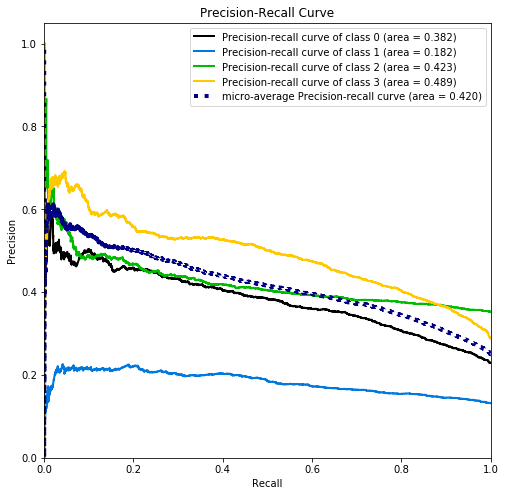

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import scikitplot as skplt
from sklearn.metrics import precision_recall_fscore_support as score

# Logestic Regression with l1 penalizer    
iter_num = 0
lr_clf = LogisticRegression(penalty='l1')
print("Logestic Regression (Penalty l1)")
for iter_num, (train, test) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train],y[train])  # train object
    y_hat = lr_clf.predict(X[test]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test],y_hat))
# Plot Precision Recall and ROC curve for the last run
prob = lr_clf.predict_proba(X[test])
plt = skplt.metrics.plot_precision_recall_curve(y[test],prob, figsize=(8,8))

Logestic Regression (Penalty l2)
====Iteration 0  ====
accuracy 0.423864075171
confusion matrix
 [[ 617    0  854  373]
 [ 227    0  541  201]
 [ 446    0 1468  841]
 [ 210    0  783 1208]]
====Iteration 1  ====
accuracy 0.432101943622
confusion matrix
 [[ 645    0  794  379]
 [ 237    1  544  208]
 [ 447    0 1475  862]
 [ 201    0  740 1236]]
====Iteration 2  ====
accuracy 0.428626592869
confusion matrix
 [[ 618    0  869  377]
 [ 227    0  535  201]
 [ 407    0 1490  847]
 [ 185    0  791 1222]]


C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


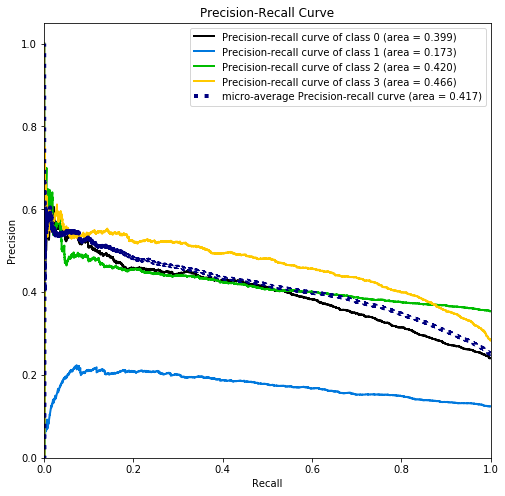

In [93]:
# Logestic Regression with l2 penalizer
iter_num = 0

lr_clf = LogisticRegression(penalty='l2')
print("Logestic Regression (Penalty l2)")
for iter_num, (train, test) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train],y[train])  # train object
    y_hat = lr_clf.predict(X[test]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test],y_hat))
    print("confusion matrix\n",mt.confusion_matrix(y[test],y_hat))
# Plot Precision Recall and ROC curve for the last run
prob = lr_clf.predict_proba(X[test])
skplt.metrics.plot_precision_recall_curve(y[test],prob, figsize=(8,8))

Analyzing the output of both the logistic regression models above, we found the the accuracy in both the models is almost the same but the confusion matrix for all the models have false positives almost zero while all other figures are way higher compared to false positive. The reason for this is that the classes are imbalanced and the model should make the decision of the class based on the class distribution in the data. <br>
So in order to resolve it, we performed the logistic regression and further all classification models using balanced class weights making the model to use the values of y to automatically adjust weights inversely proportional to class frequencies in the input data while being trained.

Logestic Regression (Penalty l1)
====Iteration 0  ====
accuracy 0.409962672159
confusion matrix
 [[ 822  142  411  406]
 [ 335   97  309  280]
 [ 666  214  875  986]
 [ 310   83  442 1391]]
====Iteration 1  ====
accuracy 0.406873471489
confusion matrix
 [[ 796  147  418  442]
 [ 348   87  310  245]
 [ 647  178  879 1045]
 [ 310   82  436 1399]]
====Iteration 2  ====
accuracy 0.407388338267
confusion matrix
 [[ 802  157  455  440]
 [ 333   94  327  249]
 [ 637  164  898  999]
 [ 320   64  459 1371]]


C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


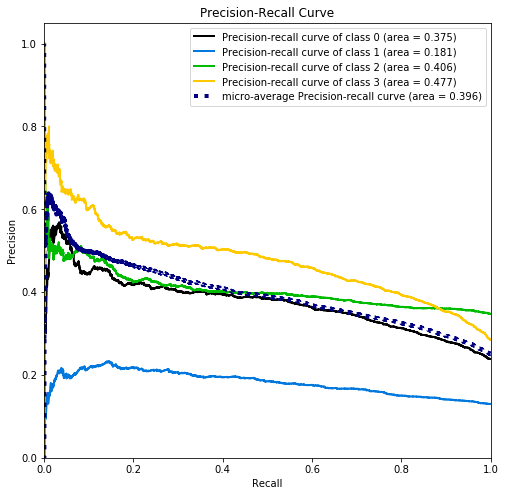

In [94]:
# Balanced Logestic Regression with l1 penalizer
iter_num = 0
lr_clf_l1 = LogisticRegression(penalty='l1', C=1.0, class_weight='balanced')
print("Logestic Regression (Penalty l1)")
for iter_num, (train, test) in enumerate(cv_object.split(X,y)):
    lr_clf_l1.fit(X[train],y[train])  # train object
    yhat = lr_clf_l1.predict(X[test]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test],yhat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test],yhat))
# Plot Precision Recall curve for the last run
prob = lr_clf_l1.predict_proba(X[test])
plt = skplt.metrics.plot_precision_recall_curve(y[test],prob, figsize=(8,8))

Logestic Regression (Penalty l2)
====Iteration 0  ====
accuracy 0.402239670485
confusion matrix
 [[ 803  168  436  473]
 [ 300   96  335  270]
 [ 619  208  890  995]
 [ 321   68  451 1336]]
====Iteration 1  ====
accuracy 0.409061655297
confusion matrix
 [[ 812  142  406  442]
 [ 321  101  341  256]
 [ 635  180  877 1025]
 [ 305   72  466 1388]]
====Iteration 2  ====
accuracy 0.405843737933
confusion matrix
 [[ 789  192  400  396]
 [ 286  109  338  255]
 [ 658  194  890 1059]
 [ 339   73  426 1365]]


C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


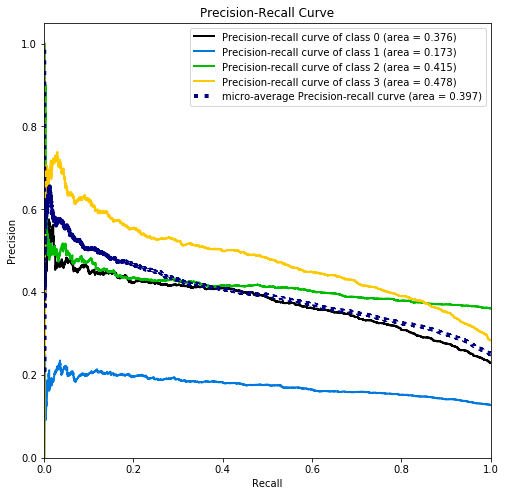

In [95]:
# Balanced Logestic Regression with l2 penalizer 
iter_num = 0
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
lr_clf_l2 = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced')
print("Logestic Regression (Penalty l2)")
for iter_num, (train, test) in enumerate(cv_object.split(X,y)):
    lr_clf_l2.fit(X[train],y[train])  # train object
    y_hat = lr_clf_l2.predict(X[test]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test],y_hat))
# Plot Precision Recall curve for the last run
prob = lr_clf_l2.predict_proba(X[test])
plt = skplt.metrics.plot_precision_recall_curve(y[test],prob, figsize=(8,8))

Analyzing the output of both the logistic regression models above, we found the the accuracy in both the models is almost the same as the unbalanced model but here the confusion matrix looks more realistic. The False positives are mo more close to zero.
Looking into the PR curve, both the model (l1 and l2 penalty) have almost the same accuracy and both show that the model's best prediction is in the classification of class 3 followed by class 2. CLass 1 prediction is the least accurate and that's expected as the only 13% of the data in the entire dataset belongs to this category.

### Weights from Logistic Regression

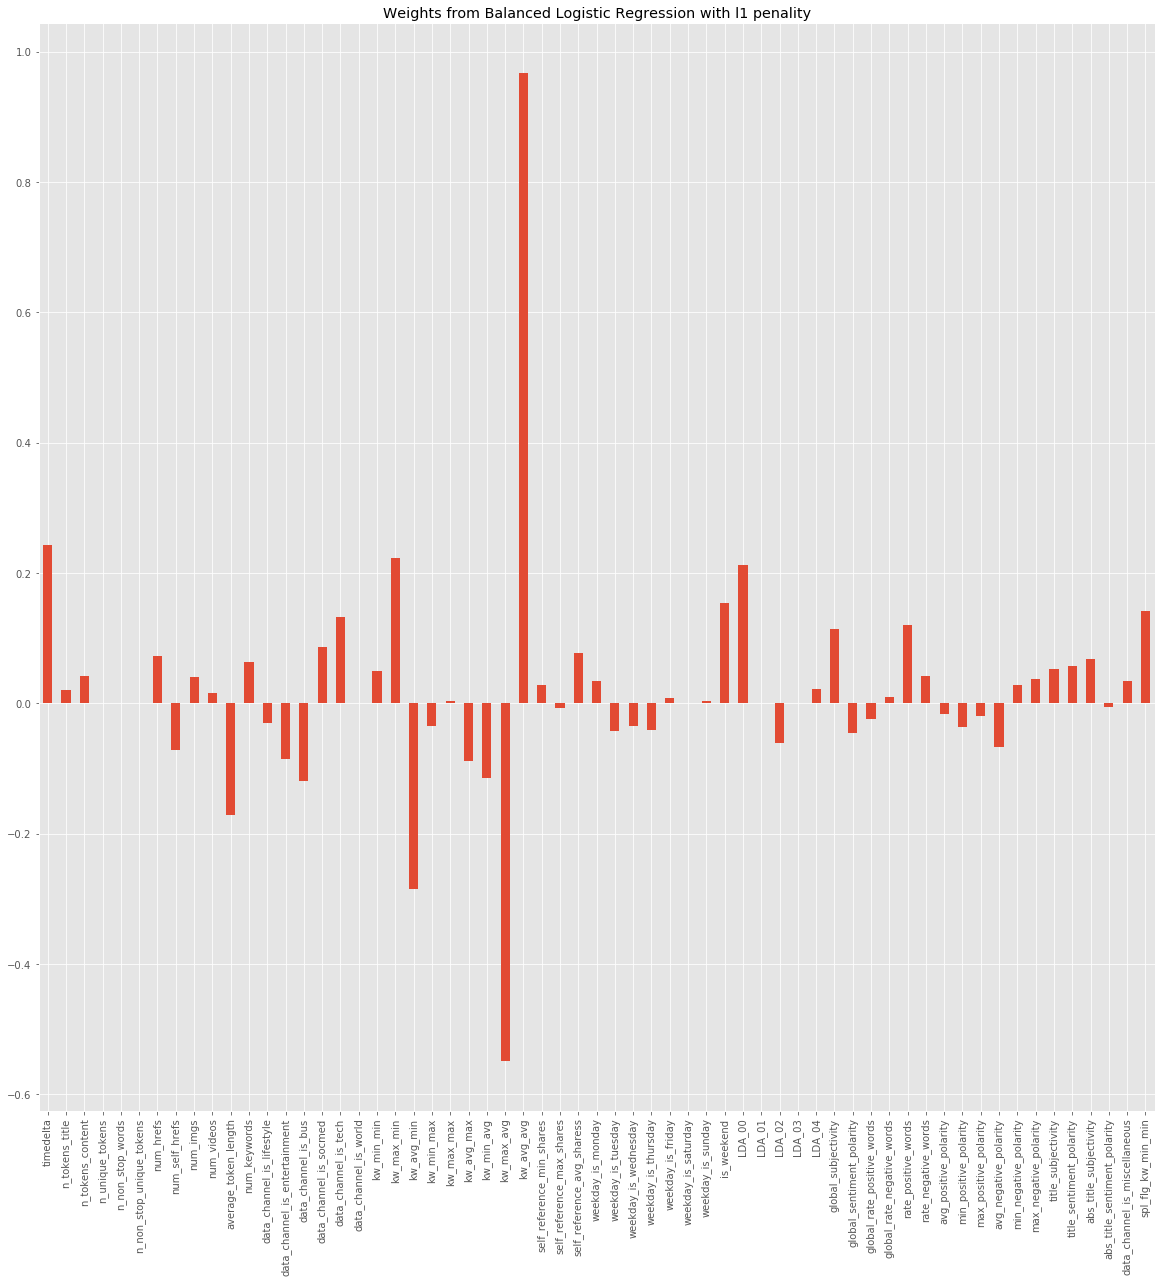

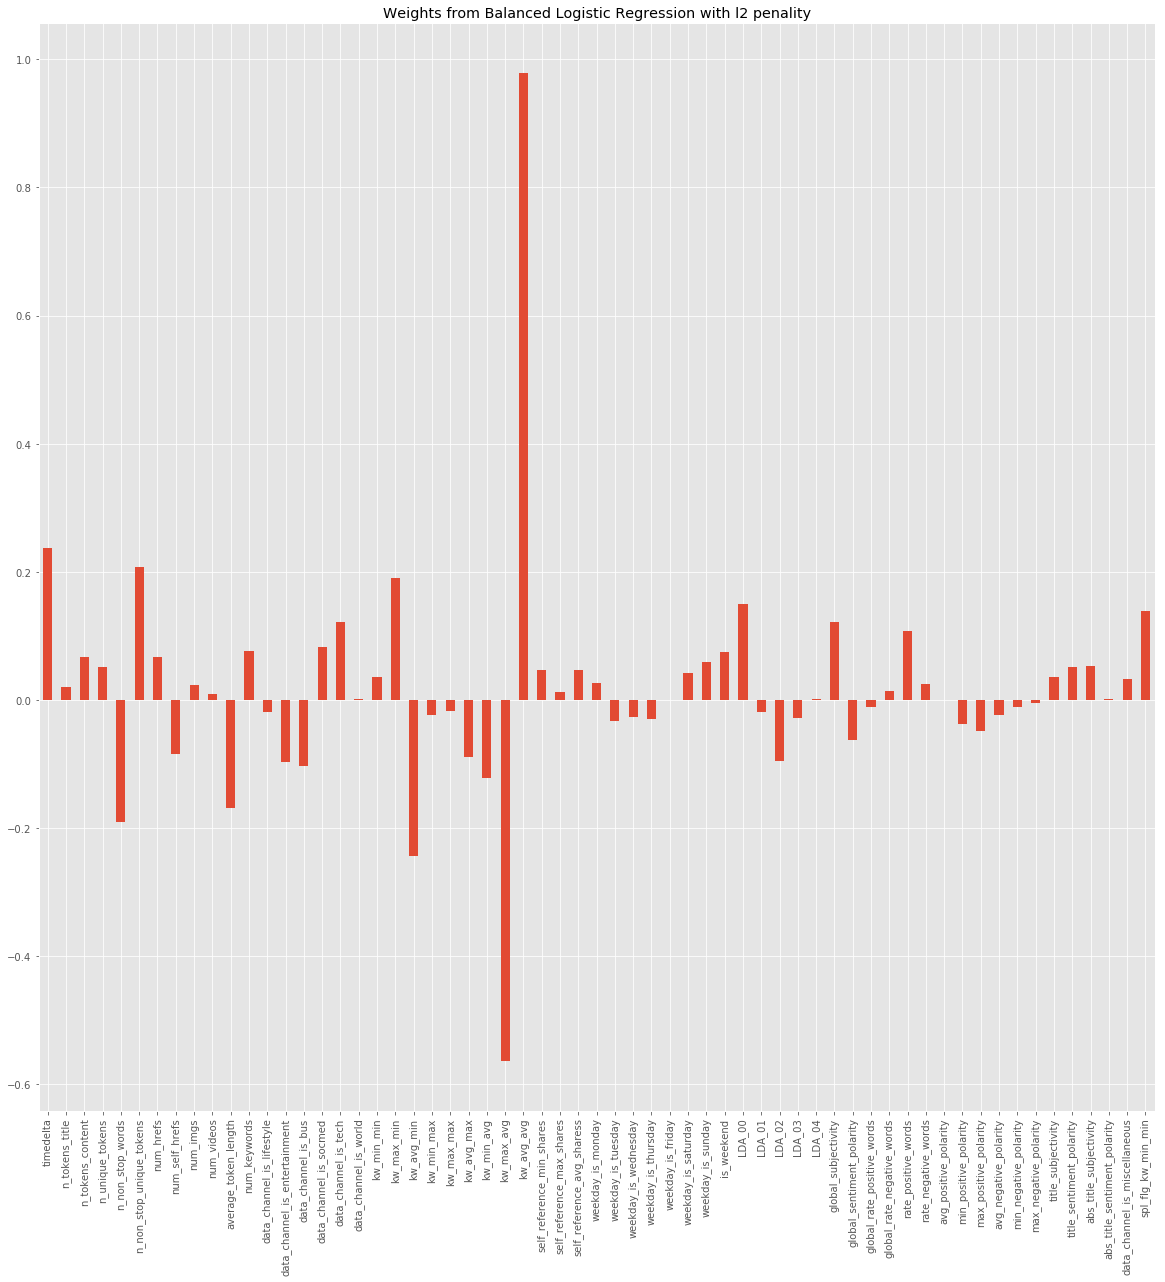

In [96]:
weights = lr_clf_l1.coef_.T # take transpose to make a column vector
variable_names = X_unscaled.columns
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(20,20))

weights = pd.Series(lr_clf_l1.coef_[0],index=variable_names)
weights.plot(kind='bar')
plt.title('Weights from Balanced Logistic Regression with l1 penality')
plt.show()

weights = lr_clf_l2.coef_.T # take transpose to make a column vector
variable_names = X_unscaled.columns
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(20,20))

weights = pd.Series(lr_clf_l2.coef_[0],index=variable_names)
weights.plot(kind='bar')
plt.title('Weights from Balanced Logistic Regression with l2 penality')
plt.show()

On analysing the weights from both the models, we found that the weight of kw_avg_avg is having the highest positive weight in the prediction of the classifiers and kw_max_avg is having the highest negative weight. Of the LDA variables, only the variable LDA_00 is having positive weight, rest all are either negative or almost zero. <br>
published day of week does not have that much weight indicating that the published day of week in not an important factor in deciding the article popularity. This can be an important conclusion as this is true and can be generalized to all the articles, then the articles can be published at any day without worring about impacting the poipularity of the article.
Regarding the data channel, the most positive weight is of the data channel technology stating that the articles related ot technology are amongst the most shared/popular articles on the web.
None of the polarities have significant weights. The title polarity and the title sentiment polatiry is have maximum  weight suggesting the importance of the title of the article in deciding its popularity.
Time delta is having positive weight suggesting that as the time passes, the number of shares of the article increases which stands true in the real world. With time the total number of shares of an article are expected to increase but the rate of increase will gradually decrease and with time, it will fall to almost 0.

### Dimension Reduction: - PCA

[  8.05  15.15  21.19  27.16  32.12  36.55  40.7   44.48  47.97  51.39
  54.67  57.72  60.7   62.97  65.2   67.19  69.16  71.11  73.03  74.92
  76.76  78.54  80.24  81.79  83.26  84.62  85.8   86.96  88.07  89.1   90.1
  91.06  91.98  92.89  93.75  94.5   95.22  95.88  96.44  96.94  97.34
  97.73  98.11  98.42  98.72  98.95  99.16  99.33  99.49  99.62  99.75
  99.85  99.91  99.96 100.   100.   100.   100.   100.   100.   100.  ]


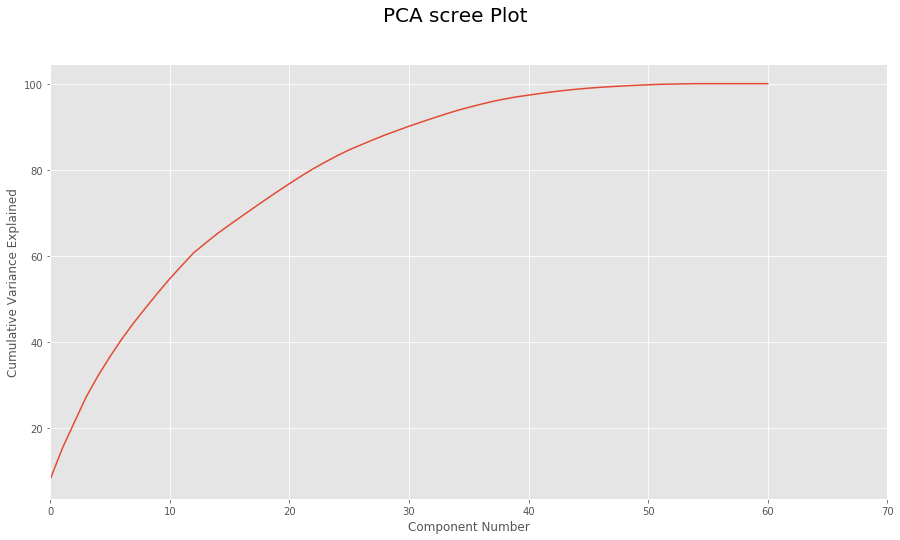

In [111]:
pca = PCA()
pca.fit(X[train], y[train])
pca_transform = pca.transform(X[train])

var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
xmin = 0
xmax = 70

fig = plt.figure(figsize=(15,8)) 
fig.suptitle('PCA scree Plot', fontsize=20)
plt.xlabel('Component Number')
plt.ylabel('Cumulative Variance Explained')
plt.xlim(xmin,xmax)

plt = plt.plot(var1)

Since the PCA Scree plot ditnt had any elbow, we decided to use principle components that can explain 95% variance in the number of shares which is around 35 principle components.

### Logistic Regression of PCA Variables (PCA variables selected to capture 95% variance)

In [113]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# setup pipeline to take PCA, then fit a Logistic Regression
clf_pipe = Pipeline(
    [('standardscaler',StandardScaler(copy=True, with_mean=True, with_std=True)),
     ('PCA',PCA(n_components=0.95)),
     ('CLF',LogisticRegression(penalty='l2', C=1.0, class_weight='balanced'))]
)
perfs = []
# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the decision tree algorithm
    clf_pipe.fit(X[train_indices],y[train_indices])
    yhat = clf_pipe.predict(X[test_indices])
    print ('Logistic Regression PCA accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(clf_pipe.score(X[test_indices], y[test_indices].ravel()))
bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))

Training: 1
Logistic Regression PCA accuracy: 0.397736043221
confusion matrix
 [[370  87 226 233]
 [143  53 172 137]
 [307 101 459 505]
 [172  30 228 664]]
             precision    recall  f1-score   support

          0       0.37      0.40      0.39       916
          1       0.20      0.10      0.14       505
          2       0.42      0.33      0.37      1372
          3       0.43      0.61      0.50      1094

avg / total       0.38      0.40      0.38      3887

Training: 2
Logistic Regression PCA accuracy: 0.394594594595
confusion matrix
 [[409  72 211 223]
 [157  43 165 140]
 [337  98 406 530]
 [145  31 243 675]]
             precision    recall  f1-score   support

          0       0.39      0.45      0.42       915
          1       0.18      0.09      0.11       505
          2       0.40      0.30      0.34      1371
          3       0.43      0.62      0.51      1094

avg / total       0.38      0.39      0.38      3885

Training: 3
Logistic Regression PCA accuracy: 

The accuracy of the Logistic regression model when using PCA components (95% variance) is almost the same as that of the m original logestic regression model with all variables. So this model is a better model as compared to the previous Logestic Regression model as the number of dimensions are almost halfed without impacting the model accuracy.

### Decision Tree Classification of Online Popularity

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

#  Set up the training and testing split function
iter_num = 0
num_instances = len(y)
                             
cv_object = StratifiedKFold(n_splits=10, shuffle=True)

#  Set up Decision Tree Classifier
clf_dt = DecisionTreeClassifier(class_weight='balanced')

for train, test in cv_object.split(X,y):
    iter_num += 1
    print ('Iteration:', iter_num)
    # train the decision tree classifier
    clf_dt.fit(X[train],y[train])
    yhat = clf_dt.predict(X[test])
    print ('accuracy Decision Tree Classifier:', mt.accuracy_score(y[test],yhat))
    print("confusion matrix\n",mt.confusion_matrix(y[test],yhat))

Iteration: 1
accuracy Decision Tree Classifier: 0.326472858245
confusion matrix
 [[257 155 303 201]
 [124  89 195  97]
 [292 202 491 387]
 [177 126 359 432]]
Iteration: 2
accuracy Decision Tree Classifier: 0.338481338481
confusion matrix
 [[288 162 283 182]
 [138  80 172 115]
 [305 197 515 354]
 [200 124 338 432]]
Iteration: 3
accuracy Decision Tree Classifier: 0.324324324324
confusion matrix
 [[290 147 287 191]
 [140  79 188  98]
 [334 180 472 385]
 [194 105 376 419]]
Iteration: 4
accuracy Decision Tree Classifier: 0.332131822863
confusion matrix
 [[284 153 294 184]
 [141  77 170 116]
 [294 205 507 365]
 [186 114 372 422]]
Iteration: 5
accuracy Decision Tree Classifier: 0.332131822863
confusion matrix
 [[271 153 330 161]
 [140  73 189 102]
 [307 198 508 358]
 [190 102 364 438]]
Iteration: 6
accuracy Decision Tree Classifier: 0.334706488157
confusion matrix
 [[300 136 293 186]
 [121  76 197 110]
 [291 193 520 367]
 [189 114 387 404]]
Iteration: 7
accuracy Decision Tree Classifier: 0.33

Logistic regression model showed better results then the Decision tree classifier. With the given number of explanatory varaibles and the complexity of the logistic regression model, this is justified as well. Decision tree classification is computationally efficient and less complex on the cost of little low accuracy as compared with logistic regression model.

### Decision Tree PCA

In [117]:
# setup pipeline to take PCA, then fit a Decision tree classifier
clf_pipe = Pipeline(
    [('standardscaler',StandardScaler(copy=True, with_mean=True, with_std=True)),
     ('PCA',PCA(n_components=0.95)),
     ('CLF_DT',DecisionTreeClassifier(class_weight='balanced'))]
)
perfs = []

# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the decision tree algorithm
    clf_pipe.fit(X[train_indices],y[train_indices])
    yhat = clf_pipe.predict(X[test_indices])
    print ('Decision Tree PCA accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(clf_pipe.score(X[test_indices], y[test_indices].ravel()))
    
bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))


Training: 1
Decision Tree PCA accuracy: 0.320041162851
             precision    recall  f1-score   support

          0       0.30      0.29      0.29       916
          1       0.14      0.16      0.15       505
          2       0.37      0.36      0.36      1372
          3       0.37      0.38      0.37      1094

avg / total       0.32      0.32      0.32      3887

Training: 2
Decision Tree PCA accuracy: 0.318661518662
             precision    recall  f1-score   support

          0       0.29      0.28      0.28       915
          1       0.16      0.17      0.17       505
          2       0.37      0.38      0.37      1371
          3       0.36      0.34      0.35      1094

avg / total       0.32      0.32      0.32      3885

Training: 3
Decision Tree PCA accuracy: 0.333590733591
             precision    recall  f1-score   support

          0       0.28      0.28      0.28       915
          1       0.19      0.20      0.20       505
          2       0.38      0.37 

The accuracy of the Decision Tree model when using PCA components (95% variance) is almost the same as that of the m original Decision Tree model with all variables. So this model is a better model as compared to the previous Decision tree model as the number of dimensions are almost halfed without impacting the model accuracy.

### KNN - Nearest Neighbor Classifier of Online Popularity

In [118]:
# %%time
# KNN Section

#  Set up the training and testing split function
iter_num = 0
num_instances = len(y)


# Set up KNN Classifier
clf_knn_l1 = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1 ) # KNN using manhattan_distance

# now get the training and testing
for train, test in cv_object.split(X,y):
    iter_num += 1
    print ('Iteration:', iter_num) 
     # train the KNN classifier
#     %time clf_knn.fit(X[train],y[train])
    clf_knn_l1.fit(X[train],y[train])
    yhat = clf_knn_l1.predict(X[test])
    total_accuracy = mt.accuracy_score(y[test], yhat)
    print ('KNN Classifier Accuracy (manhattan):', total_accuracy)
    print("confusion matrix\n",mt.confusion_matrix(y[test],yhat))

# Set up KNN Classifier
clf_knn_l2 = KNeighborsClassifier(n_neighbors=10, p=2, weights='distance') # KNN using euclidean_distance
iter_num = 0

# now get the training and testing
for train, test in cv_object.split(X,y):
    iter_num += 1
    print ('Iteration:', iter_num) 
     # train the KNN classifier
#     %time clf_knn.fit(X[train],y[train])
    clf_knn_l2.fit(X[train],y[train])
    yhat = clf_knn_l2.predict(X[test])
    total_accuracy = mt.accuracy_score(y[test], yhat)
    print ('KNN Classifier Accuracy (euclidean):', total_accuracy)
    print("confusion matrix\n",mt.confusion_matrix(y[test],yhat))

Iteration: 1
KNN Classifier Accuracy (manhattan): 0.400308721379
confusion matrix
 [[273  63 370 210]
 [114  31 243 117]
 [219  43 664 446]
 [ 93  26 387 588]]
Iteration: 2
KNN Classifier Accuracy (manhattan): 0.387902187902
confusion matrix
 [[285  56 361 213]
 [108  41 239 117]
 [234  46 634 457]
 [103  30 414 547]]
Iteration: 3
KNN Classifier Accuracy (manhattan): 0.3861003861
confusion matrix
 [[265  53 375 222]
 [121  28 232 124]
 [221  66 618 466]
 [ 91  27 387 589]]
Iteration: 4
KNN Classifier Accuracy (manhattan): 0.391606591143
confusion matrix
 [[289  48 355 223]
 [120  26 226 132]
 [211  57 637 466]
 [ 90  26 409 569]]
Iteration: 5
KNN Classifier Accuracy (manhattan): 0.396240988671
confusion matrix
 [[275  57 362 221]
 [121  33 223 127]
 [189  72 663 447]
 [ 90  28 408 568]]
Iteration: 6
KNN Classifier Accuracy (manhattan): 0.379505664264
confusion matrix
 [[271  52 385 207]
 [105  31 214 154]
 [214  64 608 485]
 [112  20 398 564]]
Iteration: 7
KNN Classifier Accuracy (manh

Accuracy wise, the KNN algorithm using eculidean and manhattan distance to compute the nearest neighbors are better then Decision trees and are almost similar to Logistic regression. Choosing different distances like eculidean and manhattan is not making much difference in the accuracy.

### KNN PCA

In [120]:
# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('standardscaler',StandardScaler(copy=True, with_mean=True, with_std=True)),
    ('PCA_Eric',PCA(n_components=0.95)),
     ('CLF_Eric',KNeighborsClassifier(n_neighbors=10, p=2, weights='distance'))]
)
perfs = []
# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the KNN algorithm
    clf_pipe.fit(X[train_indices],y[train_indices])
    yhat = clf_pipe.predict(X[test_indices])
    print ('KNN PCA accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(clf_pipe.score(X[test_indices], y[test_indices].ravel()))
    
bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))

Training: 1
KNN PCA accuracy: 0.383843581168
             precision    recall  f1-score   support

          0       0.37      0.30      0.33       916
          1       0.17      0.06      0.09       505
          2       0.39      0.48      0.43      1372
          3       0.42      0.48      0.45      1094

avg / total       0.36      0.38      0.37      3887

Training: 2
KNN PCA accuracy: 0.378120978121
             precision    recall  f1-score   support

          0       0.36      0.30      0.32       915
          1       0.16      0.05      0.08       505
          2       0.37      0.45      0.41      1371
          3       0.42      0.51      0.46      1094

avg / total       0.36      0.38      0.36      3885

Training: 3
KNN PCA accuracy: 0.376576576577
             precision    recall  f1-score   support

          0       0.40      0.33      0.36       915
          1       0.16      0.05      0.08       505
          2       0.37      0.43      0.40      1371
          

The accuracy of the KNN model when using PCA components (95% variance) is almost the same as that of the original KNN model with all variables. So this model is a better model as compared to the previous KNN model as the number of dimensions are almost halfed without impacting the model accuracy.

### Random Forest Classifier

Training: 1
Random Forest accuracy: 0.437612554669
             precision    recall  f1-score   support

          0       0.44      0.44      0.44       916
          1       0.19      0.02      0.03       505
          2       0.41      0.55      0.47      1372
          3       0.49      0.49      0.49      1094

avg / total       0.41      0.44      0.41      3887

Training: 2
Random Forest accuracy: 0.427541827542
             precision    recall  f1-score   support

          0       0.42      0.41      0.41       915
          1       0.21      0.01      0.02       505
          2       0.40      0.58      0.48      1371
          3       0.49      0.45      0.47      1094

avg / total       0.41      0.43      0.40      3885

Training: 3
Random Forest accuracy: 0.425997425997
             precision    recall  f1-score   support

          0       0.43      0.40      0.42       915
          1       0.15      0.01      0.02       505
          2       0.39      0.58      0.47   

C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



The performance evaluation are
bias:0.570
var:0.000031
expected loss:0.324942


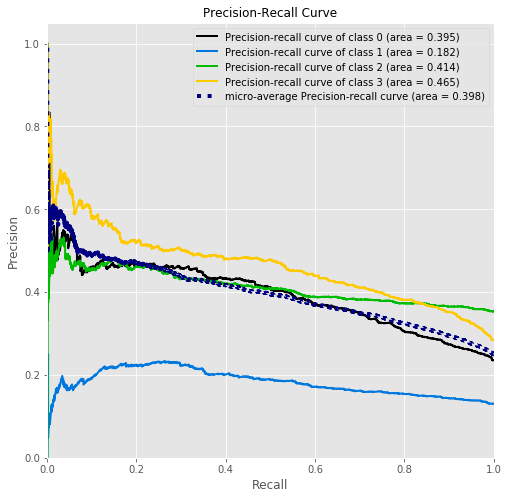

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=50, n_estimators=62, n_jobs=-1, oob_score=True, class_weight='balanced')
perfs = []
# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the Random Forest tree algorithm
    rf_clf.fit(X[train_indices],y[train_indices])
    yhat = rf_clf.predict(X[test_indices])
    print ('Random Forest accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(rf_clf.score(X[test_indices], y[test_indices].ravel()))
# Plot Precision Recall curve for the last run
prob = lr_clf_l1.predict_proba(X[test_indices])
plt = skplt.metrics.plot_precision_recall_curve(y[test_indices],prob, figsize=(8,8))

bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=62, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


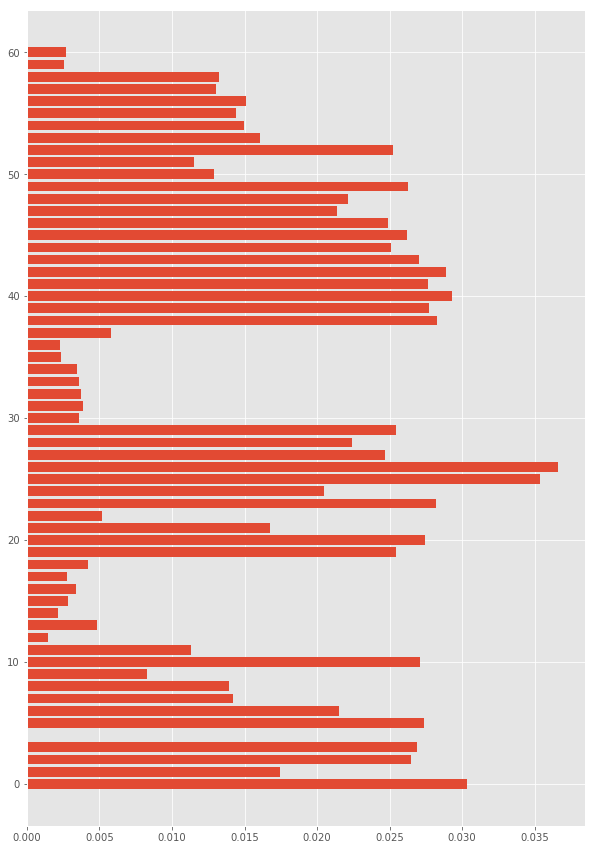

Generalization score estimate from training data 0.40905580504


{0: 'timedelta',
 1: 'n_tokens_title',
 2: 'n_tokens_content',
 3: 'n_unique_tokens',
 4: 'n_non_stop_words',
 5: 'n_non_stop_unique_tokens',
 6: 'num_hrefs',
 7: 'num_self_hrefs',
 8: 'num_imgs',
 9: 'num_videos',
 10: 'average_token_length',
 11: 'num_keywords',
 12: 'data_channel_is_lifestyle',
 13: 'data_channel_is_entertainment',
 14: 'data_channel_is_bus',
 15: 'data_channel_is_socmed',
 16: 'data_channel_is_tech',
 17: 'data_channel_is_world',
 18: 'kw_min_min',
 19: 'kw_max_min',
 20: 'kw_avg_min',
 21: 'kw_min_max',
 22: 'kw_max_max',
 23: 'kw_avg_max',
 24: 'kw_min_avg',
 25: 'kw_max_avg',
 26: 'kw_avg_avg',
 27: 'self_reference_min_shares',
 28: 'self_reference_max_shares',
 29: 'self_reference_avg_sharess',
 30: 'weekday_is_monday',
 31: 'weekday_is_tuesday',
 32: 'weekday_is_wednesday',
 33: 'weekday_is_thursday',
 34: 'weekday_is_friday',
 35: 'weekday_is_saturday',
 36: 'weekday_is_sunday',
 37: 'is_weekend',
 38: 'LDA_00',
 39: 'LDA_01',
 40: 'LDA_02',
 41: 'LDA_03',
 4

In [144]:
# feature importance
import matplotlib.pyplot as plt1
print (rf_clf)
plt1.figure(figsize=(10,15))
plt1.barh(range(len(rf_clf.feature_importances_)), rf_clf.feature_importances_)
plt1.show()

print ('Generalization score estimate from training data', rf_clf.oob_score_)

# list features with indices in order to identify feature importance from above graph
feature_index = {}
for i, f in enumerate(list(X_unscaled.columns.values)):
    feature_index[i] = f
feature_index

So far of all the models constructed, the random forest gives the best result when the accuracy and the results from the PR curve from other models are compared to it.
The important predictors as per random forest algorithm are
n_tokens_content, n_unique_tokens, n_non_stop_unique_tokens, num_hrefs, average_token_length, kw_max_min, kw_avg_min, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, avg_negative_polarity

### Random Forest PCA

Training: 1
Random Forest PCA accuracy: 0.415487522511
             precision    recall  f1-score   support

          0       0.42      0.36      0.39       916
          1       0.30      0.02      0.04       505
          2       0.39      0.56      0.46      1372
          3       0.46      0.46      0.46      1094

avg / total       0.40      0.42      0.39      3887

Training: 2
Random Forest PCA accuracy: 0.403603603604
             precision    recall  f1-score   support

          0       0.40      0.32      0.36       915
          1       0.21      0.02      0.03       505
          2       0.38      0.57      0.46      1371
          3       0.46      0.44      0.45      1094

avg / total       0.38      0.40      0.38      3885

Training: 3
Random Forest PCA accuracy: 0.417503217503
             precision    recall  f1-score   support

          0       0.41      0.37      0.39       915
          1       0.23      0.02      0.04       505
          2       0.39      0.55 

C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



The performance evaluation are
bias:0.590
var:0.000028
expected loss:0.347930


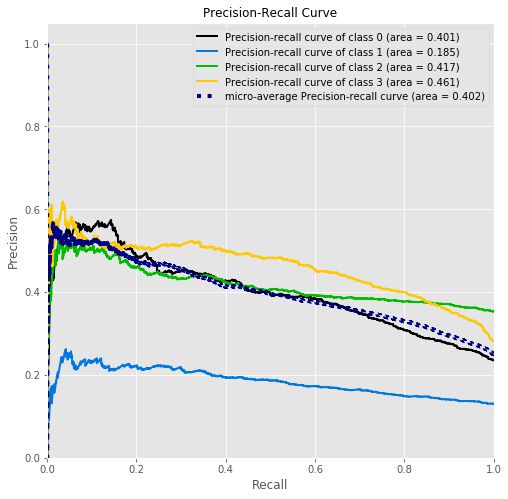

In [122]:
clf_pipe = Pipeline(
    [('standardscaler',StandardScaler(copy=True, with_mean=True, with_std=True)),
     ('PCA',PCA(n_components=0.95)),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=62, n_jobs=-1, class_weight='balanced'))]
)
perfs = []
# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the Random Forest algorithm
    clf_pipe.fit(X[train_indices],y[train_indices])
    yhat = clf_pipe.predict(X[test_indices])
    print ('Random Forest PCA accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(clf_pipe.score(X[test_indices], y[test_indices].ravel()))

# Plot Precision Recall curve for the last run
prob = lr_clf_l1.predict_proba(X[test_indices])
plt = skplt.metrics.plot_precision_recall_curve(y[test_indices],prob, figsize=(8,8))

bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))


The accuracy of the Random Forest model when using PCA components (95% variance) is a little decreased  as that of the original Random Forest model with all variables. So though the accuracy is reduced, but given the improvement in the performance of the lgorithm, this model may be treated as a better model as compared to the previous Random Forest model as the number of dimensions are almost halfed without much impacting the model accuracy.

### Naive Bayes Classifier

In [123]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
perfs = []
# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the Naive Bayes algorithm
    nb_clf.fit(X[train_indices],y[train_indices])
    yhat = nb_clf.predict(X[test_indices])
    print ('Naive Bayes accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(nb_clf.score(X[test_indices], y[test_indices].ravel()))
    
bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))

Training: 1
Naive Bayes accuracy: 0.328788268588
             precision    recall  f1-score   support

          0       0.36      0.06      0.10       916
          1       0.20      0.31      0.25       505
          2       0.39      0.14      0.21      1372
          3       0.36      0.80      0.49      1094

avg / total       0.35      0.33      0.27      3887

Training: 2
Naive Bayes accuracy: 0.319176319176
             precision    recall  f1-score   support

          0       0.32      0.05      0.09       915
          1       0.19      0.34      0.24       505
          2       0.39      0.12      0.18      1371
          3       0.36      0.78      0.49      1094

avg / total       0.34      0.32      0.25      3885

Training: 3
Naive Bayes accuracy: 0.339768339768
             precision    recall  f1-score   support

          0       0.39      0.20      0.26       915
          1       0.19      0.30      0.23       505
          2       0.44      0.12      0.18      137

C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


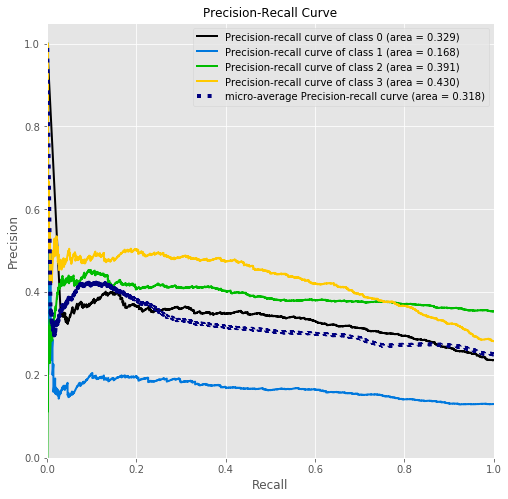

In [136]:
# Plot Precision Recall curve for the last run
prob = nb_clf.predict_proba(X[test])
plt = skplt.metrics.plot_precision_recall_curve(y[test],prob, figsize=(8,8), )

The accuracy of Naive Bayes algorithm is almost the same as that of the decision trees. The low accuracy of Naive Bayes is because it assumes that the attributes are independent though in actual they might not be. Like in this case, the attributes are not really independent of one another. For example the attributes is_weekend, weekday_is_sunday and weekday_is_saturday are highly correlated. So the assumption of the Naive Bayes algorithm fails and hence it gives less accuracy.

### Naive Bayes Classifier using PCA

Training: 1
Naive Bayes PCA accuracy: 0.344738873167
             precision    recall  f1-score   support

          0       0.29      0.10      0.15       916
          1       0.19      0.10      0.14       505
          2       0.39      0.24      0.30      1372
          3       0.35      0.79      0.49      1094

avg / total       0.33      0.34      0.29      3887

Training: 2
Naive Bayes PCA accuracy: 0.33564993565
             precision    recall  f1-score   support

          0       0.31      0.13      0.19       915
          1       0.21      0.11      0.15       505
          2       0.38      0.21      0.27      1371
          3       0.34      0.76      0.47      1094

avg / total       0.33      0.34      0.29      3885

Training: 3
Naive Bayes PCA accuracy: 0.355984555985
             precision    recall  f1-score   support

          0       0.32      0.10      0.15       915
          1       0.25      0.17      0.20       505
          2       0.40      0.23      0.

C:\Program Files\Anaconda3\envs\smu\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



The performance evaluation are
bias:0.651
var:0.000061
expected loss:0.424059


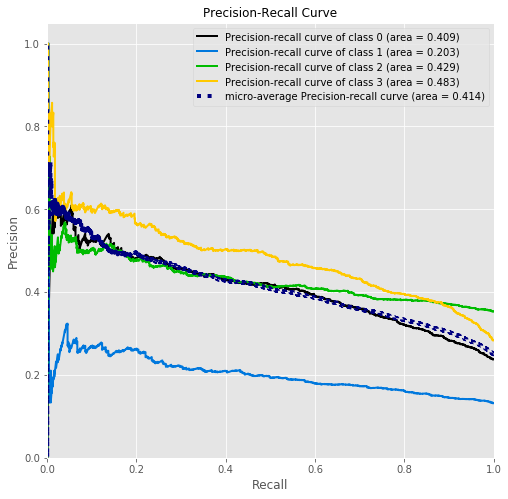

In [124]:
clf_pipe = Pipeline(
    [('standardscaler',StandardScaler(copy=True, with_mean=True, with_std=True)),
     ('PCA',PCA(n_components=0.95)),
     ('CLF',GaussianNB())]
)
perfs = []
# now get the training and testing
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    print ('Training:', iter_num+1)
    # train the Naive Bayes algorithm
    clf_pipe.fit(X[train_indices],y[train_indices])
    yhat = clf_pipe.predict(X[test_indices])
    print ('Naive Bayes PCA accuracy:', mt.accuracy_score(y[test_indices],yhat))
    print(classification_report(y[test_indices],yhat))
    perfs.append(clf_pipe.score(X[test_indices], y[test_indices].ravel()))
# Plot Precision Recall curve for the last run
prob = lr_clf_l1.predict_proba(X[test_indices])
plt = skplt.metrics.plot_precision_recall_curve(y[test_indices],prob, figsize=(8,8))    

bias = 1 - np.mean(perfs)
var = np.var(perfs)
loss = bias**2 + var
print('\nThe performance evaluation are\nbias:%.3f\nvar:%.6f\nexpected loss:%.6f' % (bias, var, loss))

### Regression

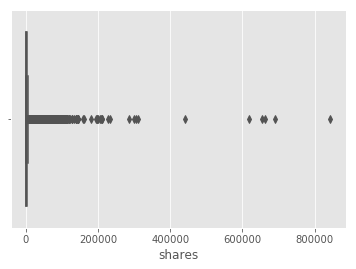

In [125]:
import seaborn as sns
sns.boxplot(x=df_news["shares"])

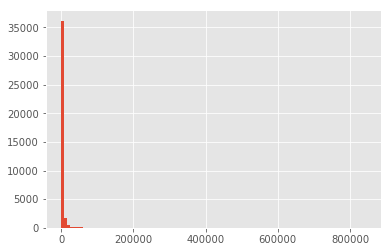

In [126]:
(df_news["shares"]).hist(bins=100)

Fom the boxplot and histogram we see that there are extreme values in the "share" variable. We can perform a log transform to see the differences below.

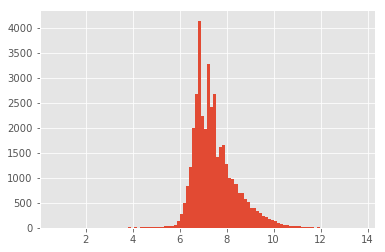

In [127]:
df_news['shares_log'] = df_news['shares'].apply(lambda x: np.log(1+x))
(df_news["shares_log"]).hist(bins=100)

In [128]:
df_news_model_reg = df_news.copy(deep=True)
y_reg = df_news_model_reg['shares_log'].values # get the labels we want
del df_news_model_reg['shares_log']
del df_news_model_reg['shares']
del df_news_model_reg['news_article_popularity']
X_reg = df_news_model_reg.values

###  Linear Regressions

r2 scores [ 0.06518584  0.0327385   0.08117946  0.11461901  0.09934803  0.11484019
  0.1430973  -0.17706708  0.13051456  0.13574836]
MSE [-0.73701144 -0.74032306 -0.9611267  -0.78643993 -0.95687273 -0.73395787
 -0.66810428 -0.8738155  -0.75928214 -0.64608244]
Mean r2 scores 0.0740204166798
Mean MSE scores -0.786301607521


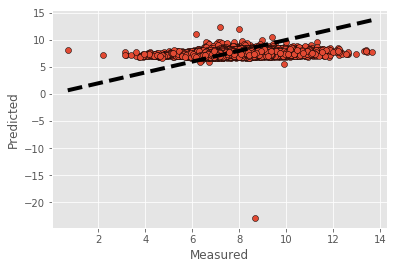

In [129]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt

def perform_kfoldregression(model, X, y, n):
    predicted = cross_val_predict(model, X, y, cv=n)
    acc_scores = cross_val_score(model, X, y, scoring='r2', cv=n)
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=n)
    print('r2 scores', acc_scores)
    print('MSE', mse_scores)
    print('Mean r2 scores', acc_scores.mean()) 
    print('Mean MSE scores', mse_scores.mean())
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

lr = linear_model.LinearRegression()
perform_kfoldregression(lr, X_reg, y_reg, 10)

Linear Regression was used to predict the number of shares for every news article. The weakness of this approach is that it assumes that our features are mutually independent and that our classes are linearly separable. The r2 score is low for the linear regression model.

### Decision Tree Regression

r2 scores [-1.02008065 -1.08835559 -0.65765838 -0.67967908 -0.56240176 -0.92076374
 -0.77397216 -0.94089338 -0.73251935 -1.573265  ]
MSE [-1.94356025 -1.63554734 -1.69237473 -1.63920286 -1.69207248 -1.53834622
 -1.48489053 -1.41066873 -1.51627207 -1.5371159 ]
Mean r2 scores -0.894958910002
Mean MSE scores -1.60900511009


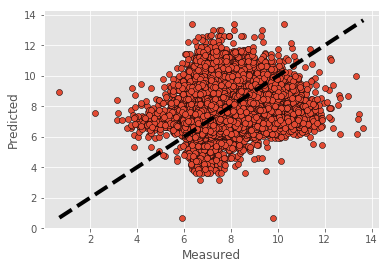

In [130]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_features=20, max_depth=100)
perform_kfoldregression(DT_regressor, X_reg, y_reg, 10)

Decision tree regression also does not provide us with a good prediction model with low values of R2
### Random Forest Regression

r2 scores [-0.18772653 -0.09651281  0.05833368  0.04396022  0.05052718  0.04060782
  0.06898419  0.07227536  0.08565855 -0.07118578]
MSE [-0.93640862 -0.8392495  -0.98502439 -0.84920262 -1.00874108 -0.79550996
 -0.7258883  -0.68871195 -0.79845286 -0.80077871]
Mean r2 scores 0.00649218768382
Mean MSE scores -0.842796798711


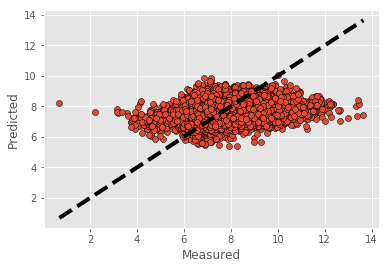

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
perform_kfoldregression(rf_regressor, X_reg, y_reg, 10)

Random Forest regression also did not provide us with a good prediction model with low/-ve values of R2 and high MSE. Furthermore using this regression approach on a classification problem does not lend itself well to a high performing model. Below we will perform classification on the data set.

<a id="Part10"></a>
# Modeling and Evaluation 6
We will be using calculating feature importance from the Random Forest Classifier to Analyze the importance of attributes. By Visually inspecting the Histogram we can infer the following:

1.	The features that have the most influence on the Target Variable are the  
    - Keywords (from 18 to 26 above)- For every article, all the keywords are ranked based on their average number of shares to get the best, worst and average keywords. For each kinds of keywords, the maximum, minimum and average number of shares are defined. This could be due to the fact that the target variable is based on the number of shares and so are these attributes. Therefore, the correlation between these attributes might be the reason for these variables to play an important part in the classification of the Target Variable.
    - Self-Reference Shares (27 to 29 above)- These attributes talk about the Min, Max and Average shares of the articles referenced in that Particular Article. Since these attributes are also based on shares they play an important part in classification of the Target Variable.
    - Words- The Variables from 1 to 5 plays are based on the word processing carried out on the articles. They also seem to have a lot of importance in the articles being shared on which the target variable is based.
    - Time Delta (Number 0 above)- Days Between the article publication and the dataset acquisition. Although an article is shared more frequently when its first published, the more time an article has been around the more shares it tends to have. Therefore, this is an important feature in classification of the Target Variable
    - LDA Attributes (38 to 42 above)- The Latent Dirichlet Allocation algorithm was applied to all the text in the article (known before publication) in order to first identify the five top relevant topics and measure the closeness of each articles to such topics. But the creators of this dataset did not publish any additional data on what these attributes mean. These attributes also seem to play a significant role in the Classification of the Target Variable.
    - Natural Language Processing ( 43 to 59 above)- These Attributes are based on the natural language processing and play a significant role in the Classification of the Target Variable as well..
2.	The features that have the least influence on the Target Variable are
    - Day of the week(30 to 37) – Which day of the week the article was shared 
    - Data channel(12 to 17)- The type of article

<a id="Part10"></a>
# Deployment
This lab introduces and implements various algorithms to tackle the challenge of predicting and classifying news articles into low popularity, medium popularity, high popularity and extreme popularity by measuring the count of shares in before publication approach. <br>
<br>
Despite of using various methods of feature selection, many complex algorithms and adaptive boosting, accuracy values are not high. So, we believe that apart from using and working upon features in dataset if more metadata about articles is made available it would really enable to establish more concrete relationship between features of article and its popularity. 
Future work will include, 
1. The exploration of more advanced features regarding content like trend analysis. 
2. The evaluation of the prediction model on more complex and more unbalanced popularity prediction datasets. 
3. The comparison of the model with many other state-of-the-art techniques. <br>

Once we have a stronger and accurate model we could build api's around it, and deploy it in cloud application engines which could be configured to source company’s data from bigdata engine like google BigQuery for analysis and predict the shares of their publications. Also, the research could be open-sourced for other developers to extend/improve on it.

<a id="Part11"></a>
# Exceptional Work
### Automating Parameter Selection using PCA Pre-Processing + KNN or Random Forest Pipeline
While doing this lab, we experienced tedious cycles of trying different parameters for the classifiers and cross validating the results through the specified data splits in the cross validators. It was very time consuming, therefore we sought a method of encapsulating the workflow in python.  In the following section, we show a way of using the Pipeline and the GridSearchCV classes to automate the best selection of parameters based on accuracy score.

Here, we have pickled the df_news dataset which was used in the above classification and regressios model analysis and are using it in the following workflow.

### Cross Validation Object
As mentioned in the data preparation section, this dataset is unbalanced and therefore we are using StratifiedKFold to construct a cross validation object (cv_object). This will make sure that all classes are represented in the cross validation loops.

### Pipeline of PCA + KNN Classifier on Online News Popularity - Find an optimal n_neighbors value

In [147]:
%%time
cv_object = StratifiedKFold(n_splits=3, shuffle=True)
# try different n_neighbors parameters using GridSearchCV

param = {'CLF_NEWS__n_neighbors': (10, 20, 30, 40, 50),}
# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA_NEWS',PCA(n_components=35)),
     ('CLF_NEWS',KNeighborsClassifier(n_neighbors=10))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(X,y):  
    grid_search = GridSearchCV(clf_pipe, param, n_jobs=6, verbose=1, scoring='accuracy', refit=True)
    grid_search.fit(X[train], y[train])
    print('***Iterating*************')
    # print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(param.keys()):
            print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X[test])
    print('Accuracy Score: ', mt.accuracy_score(y[test], predictions))



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:  8.8min finished


***Iterating*************
Best parameters set:
	CLF_NEWS__n_neighbors: 50
Accuracy Score:  0.395366795367
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:  7.6min finished


***Iterating*************
Best parameters set:
	CLF_NEWS__n_neighbors: 40
Accuracy Score:  0.398053753475
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:  5.7min finished


***Iterating*************
Best parameters set:
	CLF_NEWS__n_neighbors: 50
Accuracy Score:  0.404495249865
Wall time: 23min 39s


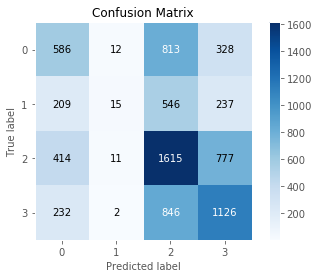

Accuracy Score:  0.430171193204


In [148]:
# Examine metrics of KNN Model with best select parameters
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)
yhat = grid_search.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test,yhat)
plt.show()
print('Accuracy Score: ', mt.accuracy_score(y_test, yhat))

### The PCA + KNN + GridSearchCV  Pipeline Workflow
In the above workflow, we have built a pipeline with a PCA pre-processor limiting the features to 35 out of the 61 total features. The number 35 was chosen because in the data preparation section, it was seen in the Scree plot that 35 variables can account for 95% of the result.

After the PCA preprocessor, next in the pipeline is a KNN Classifier (KNeighborsClassifier) which require an n_neighbors parameter. This is the value that we are trying to optimize for the classifier.  Because of the data size used here (38,845 records and 35 features after PCA), it was determined that we can start parameter selection from 10 to 50. The reason for this is not to overfit the model (by using low n_neighbors value). 

With the pipeline established, this is used as a parameter to GridSearchCV where we are able to query the grid_search object for best parameter selection.  As we are using the cv_object cross validator to test for stability of the parameter choices, we iterate 3 times and finally when the best parameter is selected we are able to do a final metric measurement using the re-fitted grid_search object with the best chosen parameter of 50 as was chosen from the param input dictionary and show the resulting accuracy score of .54 as well as the above confusion matrix plot showing the classifications of the 4 classes. The confusion matrix is showing us that the majority of the correct predictions are falling within the low and medium popularity classes (1312 and 2095) and few (44) in the high popularity classes with 750 at the extreme popularity class. A classification score of .54 is thought to be robust considering there are 4 classes dividing a large dataset and the skew is more to the low and medium classes.

### Pipeline of PCA + Random Forest Classifier on Online News Popularity

In [149]:
%%time
# find best max_depth and n_estimators parameter for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

param = {'CLF__max_depth': (10, 50, 150), 'CLF__n_estimators': (50, 200, 500),}

clf_pipe = Pipeline(
    [('PCA',PCA(n_components=20)),
     ('CLF',RandomForestClassifier(max_depth=10, n_estimators=61, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(X,y):  
    grid_search = GridSearchCV(clf_pipe, param, n_jobs=6, verbose=1, scoring='accuracy')
    grid_search.fit(X[train], y[train])
    print('***Iterating*************')
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(param.keys()):
            print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X[test])
    print('Accuracy Score: ', mt.accuracy_score(y[test], predictions))
    

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:  7.5min finished


***Iterating*************
Best parameters set:
	CLF__max_depth: 10
	CLF__n_estimators: 200
Accuracy Score:  0.414131274131
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:  7.6min finished


***Iterating*************
Best parameters set:
	CLF__max_depth: 10
	CLF__n_estimators: 500
Accuracy Score:  0.41172381835
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:  7.5min finished


***Iterating*************
Best parameters set:
	CLF__max_depth: 10
	CLF__n_estimators: 200
Accuracy Score:  0.416235421333
Wall time: 23min 45s


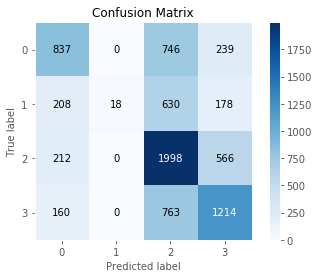

In [ ]:
# Examine metrics of KNN Model with best select parameters
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)
yhat = grid_search.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test,yhat)
plt.show()

### The PCA + KNN + RandomForest Pipeline Workflow
In the above workflow, we have built a pipeline with a PCA pre-processor limiting the features to 35 out of the 61 total features. The number 35 was chosen because in the data preparation section, it was seen in the Scree plot that 35 variables can account for 95% of the result.

After the PCA preprocessor, next in the pipeline is a Random Forest Classifier (RandomForestClassifier) which require the max_depth and n_estimators parameters. These are the values that we are trying to optimize for the classifier. In Random Forest Classification, sub trees are built for the classifiers.  These are used as estimators and thus the n_estimator parameter dictates how many of these sub trees are built. For each one of these sub trees, we can specify the maximum depth or levels at which the sub trees can be built by the max_depth parameter.  It can be observed the param dictionary used as input to the workflow that we are giving max_depth possible values of 10, 50 and 150 while we are giving n_estimators values of 50, 200 and 500 to try. We can probably go to a higher number of params to try, however the processing time and power of the available platform (macbook pro) is limited, so we opted for these as manual trials indicated that these ranges work well.

With the pipeline established, this is used as a parameter to GridSearchCV where we are able to query the grid_search object for best parameter selection. As we are using the cv_object cross validator to test for stability of the parameter choices, we iterate 3 times and finally when the best parameters are selected we are able to do a final metric measurement using the re-fitted grid_search object with the best chosen parameters of 10 max_depth and 500 n_estimators as was chosen from the param input dictionary and show the resulting accuracy score of .42 as well as the above confusion matrix plot showing the classifications of the 4 classes. The confusion matrix shows us that the majority of the true positives are falling within the low and medium popularity classes at 1306 and 2046 respectively.A classification score of .42 is thought to be robust considering there are 4 classes dividing a large dataset and the skew is more to the low and medium classes.

### Comparison of KNN and RandomForest performance after optimizing parameters

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


cv_object = StratifiedKFold(n_splits=10, shuffle=True)

clf_array = [
            ('KNN',                KNeighborsClassifier(n_neighbors=50)),
            ('Random Trees',       RandomForestClassifier(max_depth=10, n_estimators=61)),
            ]

for clf in clf_array:
    acc = cross_val_score(clf[1], X, y, cv = cv_object)
    print (clf[0], acc.mean())

### Analysis of KNN and Random Forest Comparison
In this code block, we used the cross_val_score class in order to see the final outputs of the KNN and Random Forest Classifiers after the parameters were selected for best accuracy in the above workflows. It can be seen that the Random Forest Classifier has a slightly better score than the KNN Classifier at .44 versus .41, however the scores only tell part of the story. Other factors such as dataset balance and the size of the dataset as well as the manner in which the data is being split in the validator can contribute to the score. What's important is the stability in that each validation loop does not vary greatly. 

### SVC using RBFSampler and Nystroem kernel approximation algorithms
Since the dataset is big and has large number of expanatory variables, the SVC algorithm takes very long to run. Standard kernelized SVMs do not scale well to large datasets, but using an approximate kernel map like RBFSampler and Nystoem, it is possible to use much more efficient linear SVMs.

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA

# create pipeline from kernel approximation and linear svm
feature_map_fourier = RBFSampler(n_components=2000)
feature_map_nystroem = Nystroem(gamma=.8, random_state=1, n_components=2000)

fourier_approx_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("svm", svm.LinearSVC(class_weight='balanced'))])

nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svm.LinearSVC(class_weight='balanced'))])

fourier_approx_svm.fit(X[train], y[train])
yhat = fourier_approx_svm.predict(X[test])
total_accuracy = mt.accuracy_score(y[test], yhat)
print ('Accuracy of Linear SVM using RBFSampler:', total_accuracy)

nystroem_approx_svm.fit(X[train], y[train])
yhat = nystroem_approx_svm.predict(X[test])
total_accuracy = mt.accuracy_score(y[test], yhat)
print ('Accuracy of Linear SVM using Nystroem:', total_accuracy)

Accuracy of Linear SVM using RBFSampler: 0.270424710425
Accuracy of Linear SVM using Nystroem: 0.352895752896
